In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [20]:
import datetime

In [21]:
df=pd.read_csv(r'E:\user\rasad qualifying task\source\data\Data_ForPart.csv')

In [22]:
df.head()

,RowIndex,Time,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,TrainReturn,TestRetrun
0,1,2/25/2018,13902815.0,1400000.0,3.0,425.0,12999993.0,2302822.0,254.0,6.0,823.940000,0
1,2,2/26/2018,3714235.0,4694000.0,4.0,167.0,8408235.0,0.0,152.0,0.0,804.423333,0
2,3,2/27/2018,5161907.0,2350000.0,2.0,220.0,6980517.0,531390.0,177.0,2.0,833.563333,0
3,4,3/2/2018,13509496.0,700000.0,1.0,184.0,10170775.0,4038721.0,264.0,5.0,836.239000,0
4,5,3/3/2018,2432851.0,700000.0,1.0,91.0,2800480.0,332371.0,50.0,2.0,807.632000,0


In [23]:
df.shape

(998, 12)

In [24]:
df['Time']=pd.to_datetime(df['Time'])

### adding some other features

In [25]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df['day_of_week']=df['Time'].dt.weekday

### the weekday starts from monday=0

In [26]:
df['week']=0
for i in range(998):
    df['week'][i]=datetime.date(df['year'][i],df['month'][i],df['day'][i]).isocalendar()[1]

<ipython-input-26-96fb7066e557>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'][i]=datetime.date(df['year'][i],df['month'][i],df['day'][i]).isocalendar()[1]


In [27]:
df.head()

,RowIndex,Time,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,TrainReturn,TestRetrun,year,month,day,day_of_week,week
0,1,2018-02-25,13902815.0,1400000.0,3.0,425.0,12999993.0,2302822.0,254.0,6.0,823.940000,0,2018,2,25,6,8
1,2,2018-02-26,3714235.0,4694000.0,4.0,167.0,8408235.0,0.0,152.0,0.0,804.423333,0,2018,2,26,0,9
2,3,2018-02-27,5161907.0,2350000.0,2.0,220.0,6980517.0,531390.0,177.0,2.0,833.563333,0,2018,2,27,1,9
3,4,2018-03-02,13509496.0,700000.0,1.0,184.0,10170775.0,4038721.0,264.0,5.0,836.239000,0,2018,3,2,4,9
4,5,2018-03-03,2432851.0,700000.0,1.0,91.0,2800480.0,332371.0,50.0,2.0,807.632000,0,2018,3,3,5,9


In [28]:
df.index=df['Time']

In [30]:
df.drop(['RowIndex','Time','TestRetrun'],axis=1,inplace=True)

In [31]:
df.head()

,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,TrainReturn,year,month,day,day_of_week,week
Time,,,,,,,,,,,,,,
2018-02-25,13902815.0,1400000.0,3.0,425.0,12999993.0,2302822.0,254.0,6.0,823.940000,2018,2,25,6,8
2018-02-26,3714235.0,4694000.0,4.0,167.0,8408235.0,0.0,152.0,0.0,804.423333,2018,2,26,0,9
2018-02-27,5161907.0,2350000.0,2.0,220.0,6980517.0,531390.0,177.0,2.0,833.563333,2018,2,27,1,9
2018-03-02,13509496.0,700000.0,1.0,184.0,10170775.0,4038721.0,264.0,5.0,836.239000,2018,3,2,4,9
2018-03-03,2432851.0,700000.0,1.0,91.0,2800480.0,332371.0,50.0,2.0,807.632000,2018,3,3,5,9


In [32]:
df.isnull().sum()

Buy_I_Volume          5
Buy_N_Volume          5
Buy_Count_ClientN     5
Buy_Count_ClientI     5
Sell_I_Volume         5
Sell_N_Volume         5
Sell_Count_ClientI    5
Sell_Count_ClientN    5
TrainReturn           0
year                  0
month                 0
day                   0
day_of_week           0
week                  0
dtype: int64

In [33]:
df=df.dropna(axis=0,)

In [34]:
df.shape

(993, 14)

## dividing data into train, validation and test dataframe

In [57]:
train=df[:800]
val=df[801:905]
test=df[906:]

In [58]:
train_x=train.drop('TrainReturn',axis=1)
train_y=train['TrainReturn']
val_x=val.drop('TrainReturn',axis=1)
val_y=val['TrainReturn']
test_x=test.drop('TrainReturn',axis=1)
test_y=test['TrainReturn']

In [59]:
train_y.tail()

Time
2021-07-17    993.940000
2021-07-18    715.250667
2021-07-19    860.169333
2021-07-20    796.071333
2021-07-23    765.415333
Name: TrainReturn, dtype: float64

In [60]:
val.tail()

,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,TrainReturn,year,month,day,day_of_week,week
Time,,,,,,,,,,,,,,
2021-12-20,1313087.0,245024.0,2.0,208.0,1543559.0,14552.0,187.0,1.0,865.743000,2021,12,20,0,51
2021-12-21,2098081.0,23816.0,1.0,248.0,2116423.0,5474.0,180.0,1.0,720.825333,2021,12,21,1,51
2021-12-27,4483736.0,240592.0,2.0,167.0,2977475.0,1746853.0,228.0,3.0,960.496667,2021,12,27,0,52
2021-12-28,4163287.0,262131.0,2.0,400.0,4101503.0,323915.0,459.0,2.0,913.120000,2021,12,28,1,52
2021-12-31,6674728.0,89402.0,4.0,429.0,5131874.0,1632256.0,438.0,2.0,1021.810000,2021,12,31,4,52


In [76]:
test.head()

,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,TrainReturn,TestRetrun,year,month,day,day_of_week,week
Time,,,,,,,,,,,,,,,
2022-01-02,2889387.0,884807.0,3.0,266.0,3714036.0,60158.0,215.0,2.0,0.0,0,2022,1,2,6,52
2022-01-07,2083483.0,1488114.0,2.0,199.0,3516997.0,54600.0,212.0,1.0,0.0,0,2022,1,7,4,1
2022-01-08,2118294.0,0.0,0.0,165.0,2078632.0,39662.0,219.0,1.0,0.0,0,2022,1,8,5,1
2022-01-10,1321413.0,17749.0,2.0,110.0,1288162.0,51000.0,160.0,2.0,0.0,0,2022,1,10,0,2
2022-01-11,1731128.0,2050553.0,2.0,121.0,2332234.0,1449447.0,230.0,2.0,0.0,0,2022,1,11,1,2


## visuallizing

#### 1 train return

<AxesSubplot:xlabel='Time'>

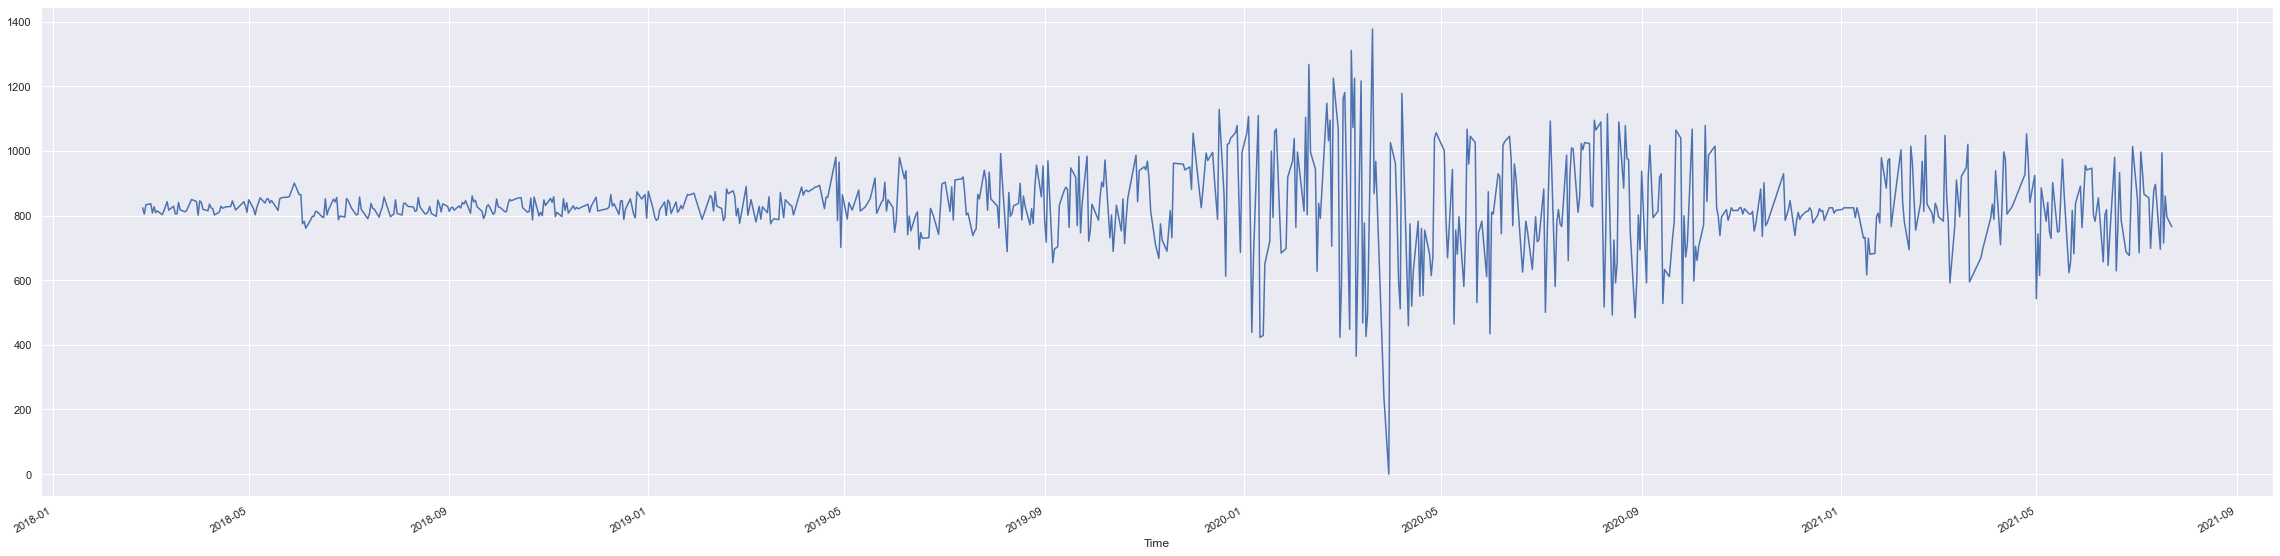

In [132]:
plt.figure(figsize=(40,10))
train['TrainReturn'].plot()

<AxesSubplot:xlabel='year,month,week'>

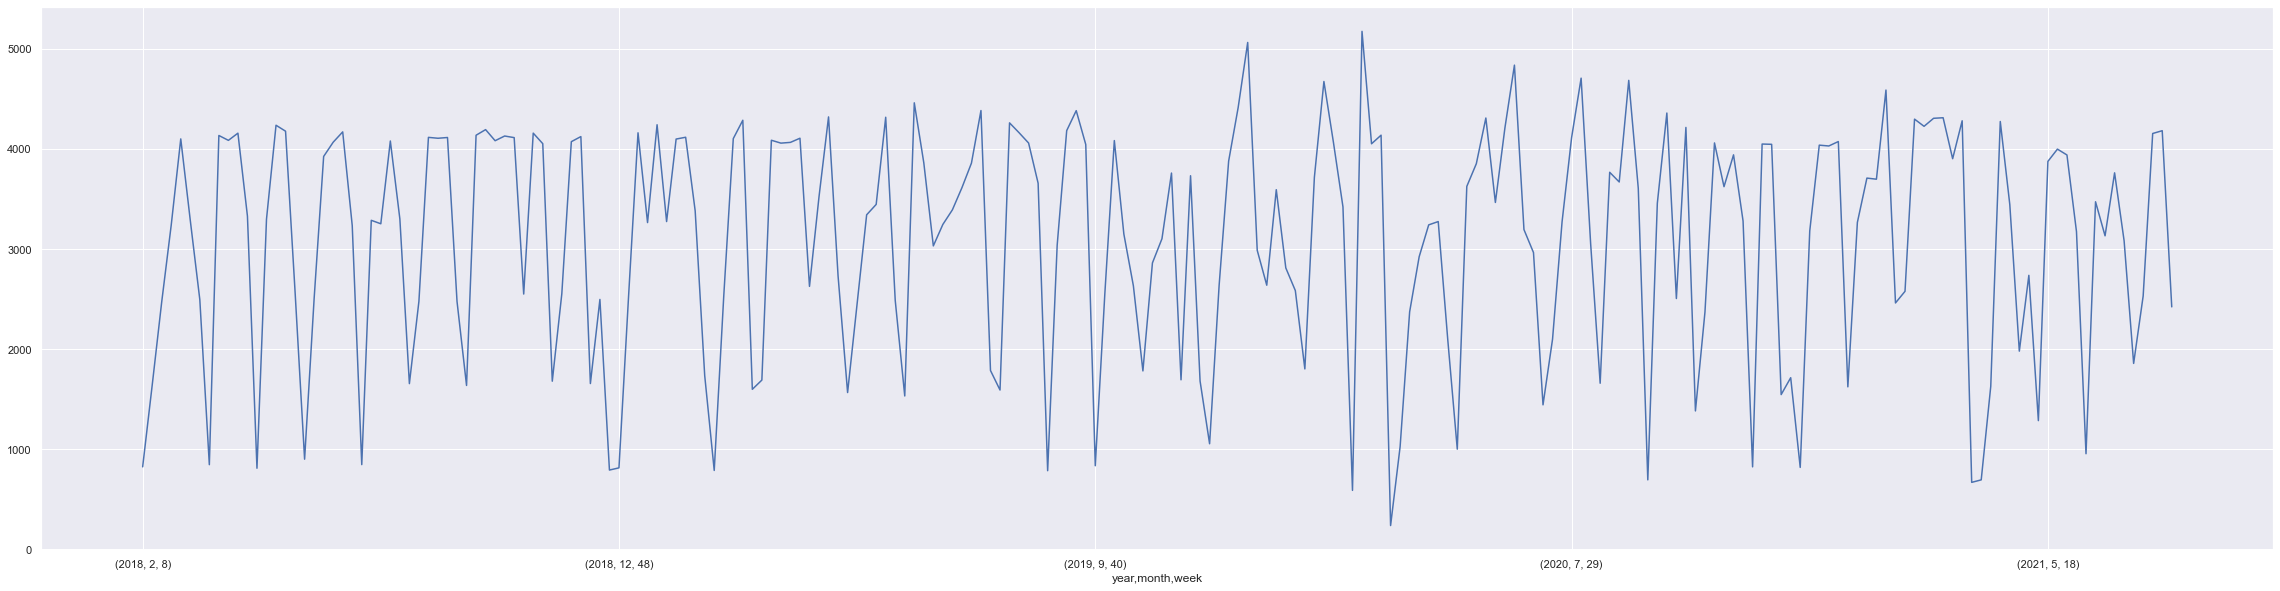

In [39]:
plt.figure(figsize=(40,10))
train.groupby(['year','month','week'])['TrainReturn'].sum().plot()

<AxesSubplot:xlabel='year,month,week'>

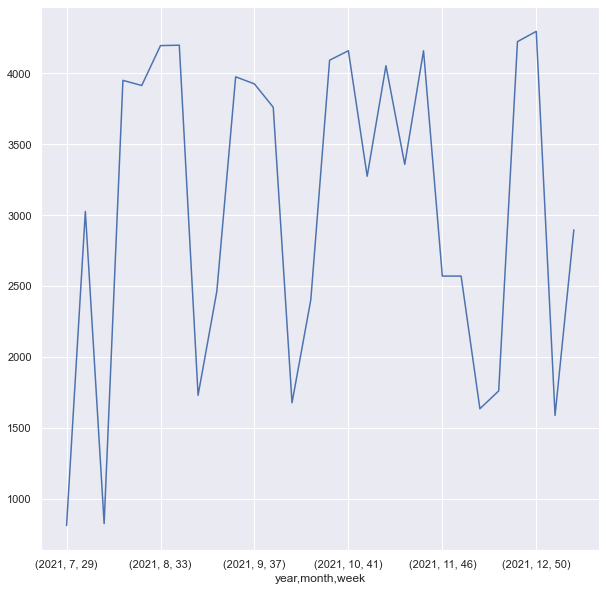

In [40]:
plt.figure(figsize=(10,10))
val.groupby(['year','month','week'])['TrainReturn'].sum().plot()

#### 2 real customers purchase volume

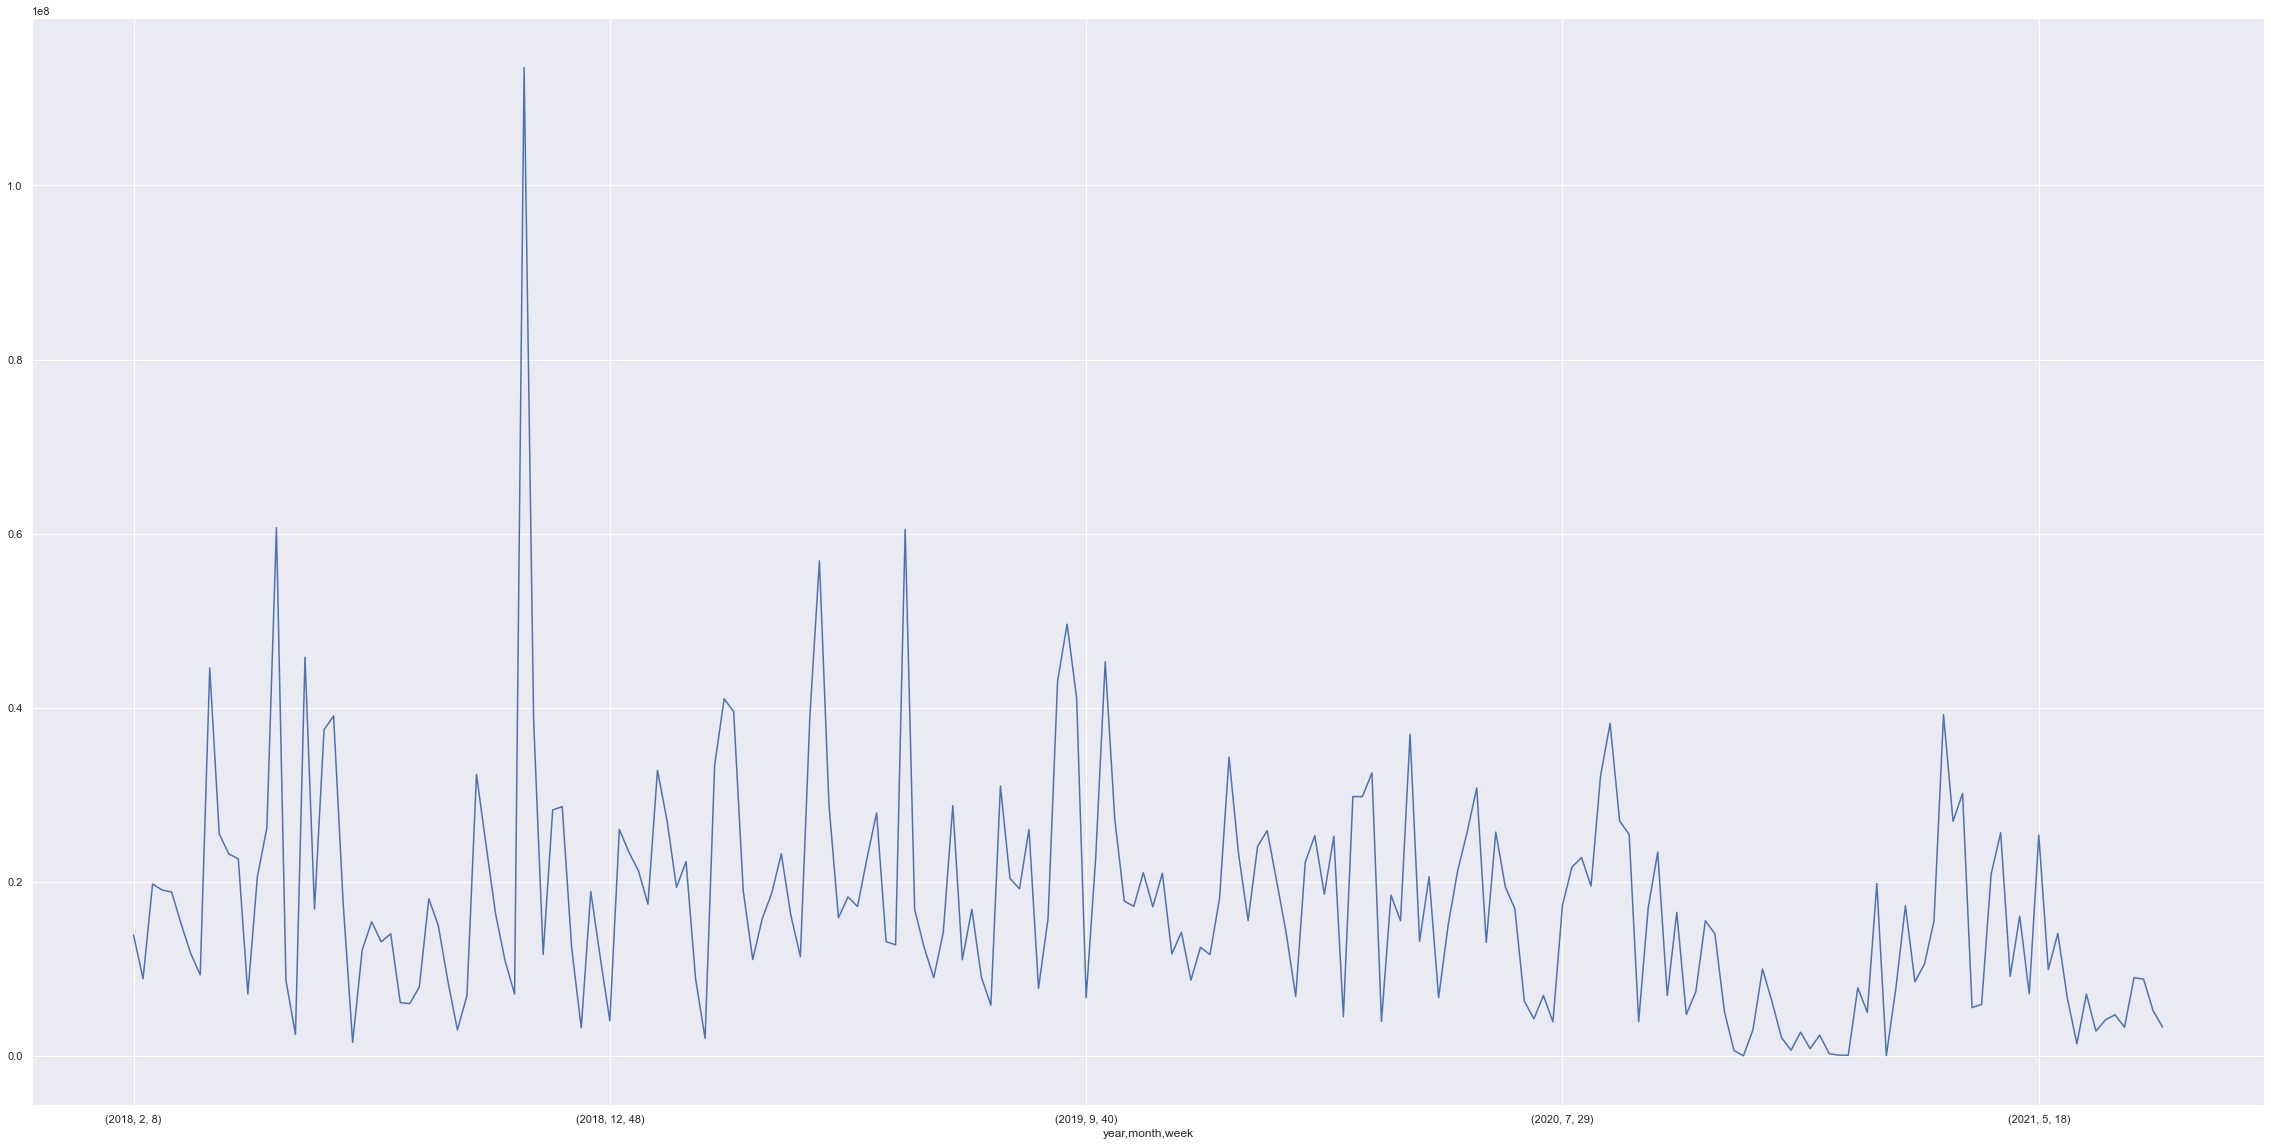

In [41]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Buy_I_Volume'].sum().plot();

#### 3 legal customer purchase volume

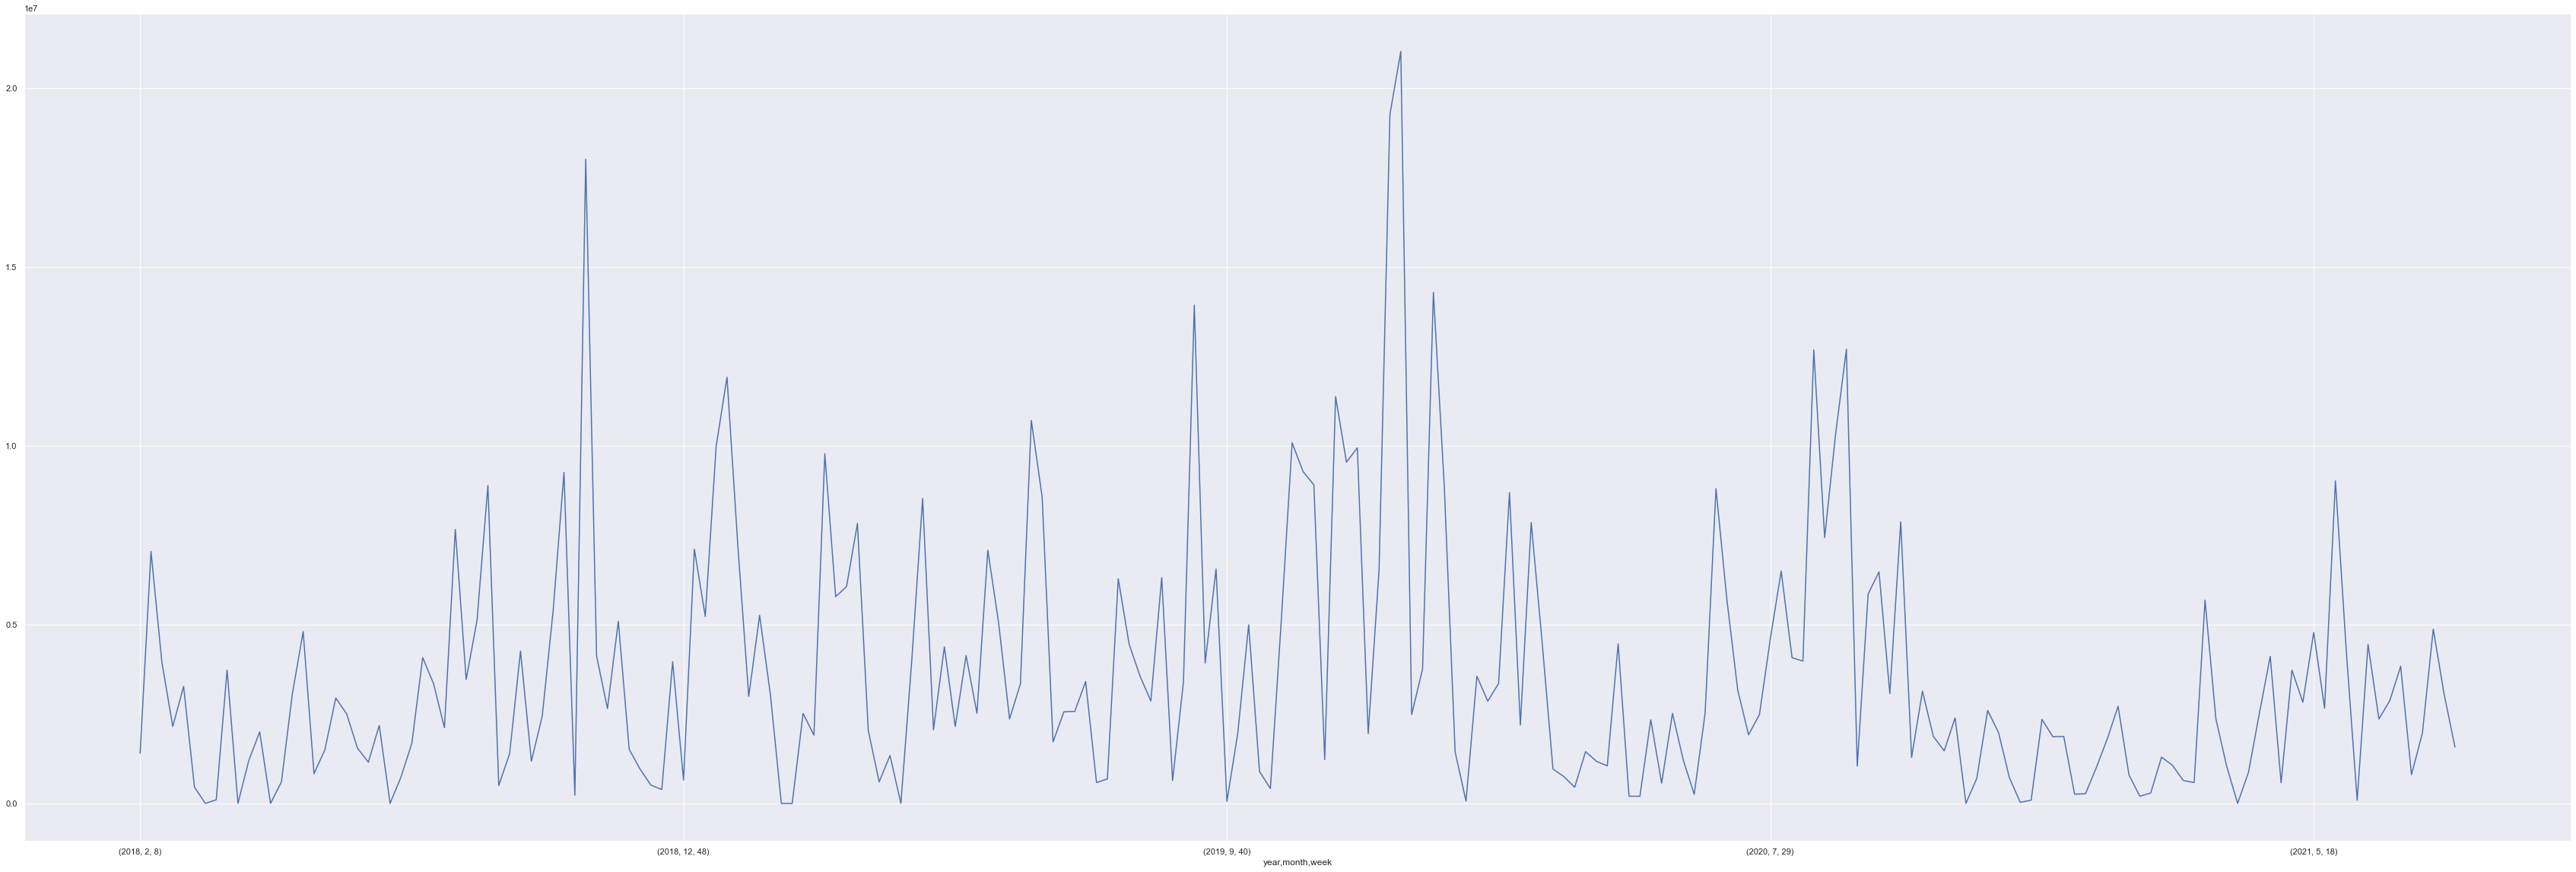

In [42]:
plt.figure(figsize=(60,20))
train.groupby(['year','month','week'])['Buy_N_Volume'].sum().plot();

#### 4 number of real clients who have purchased this stock

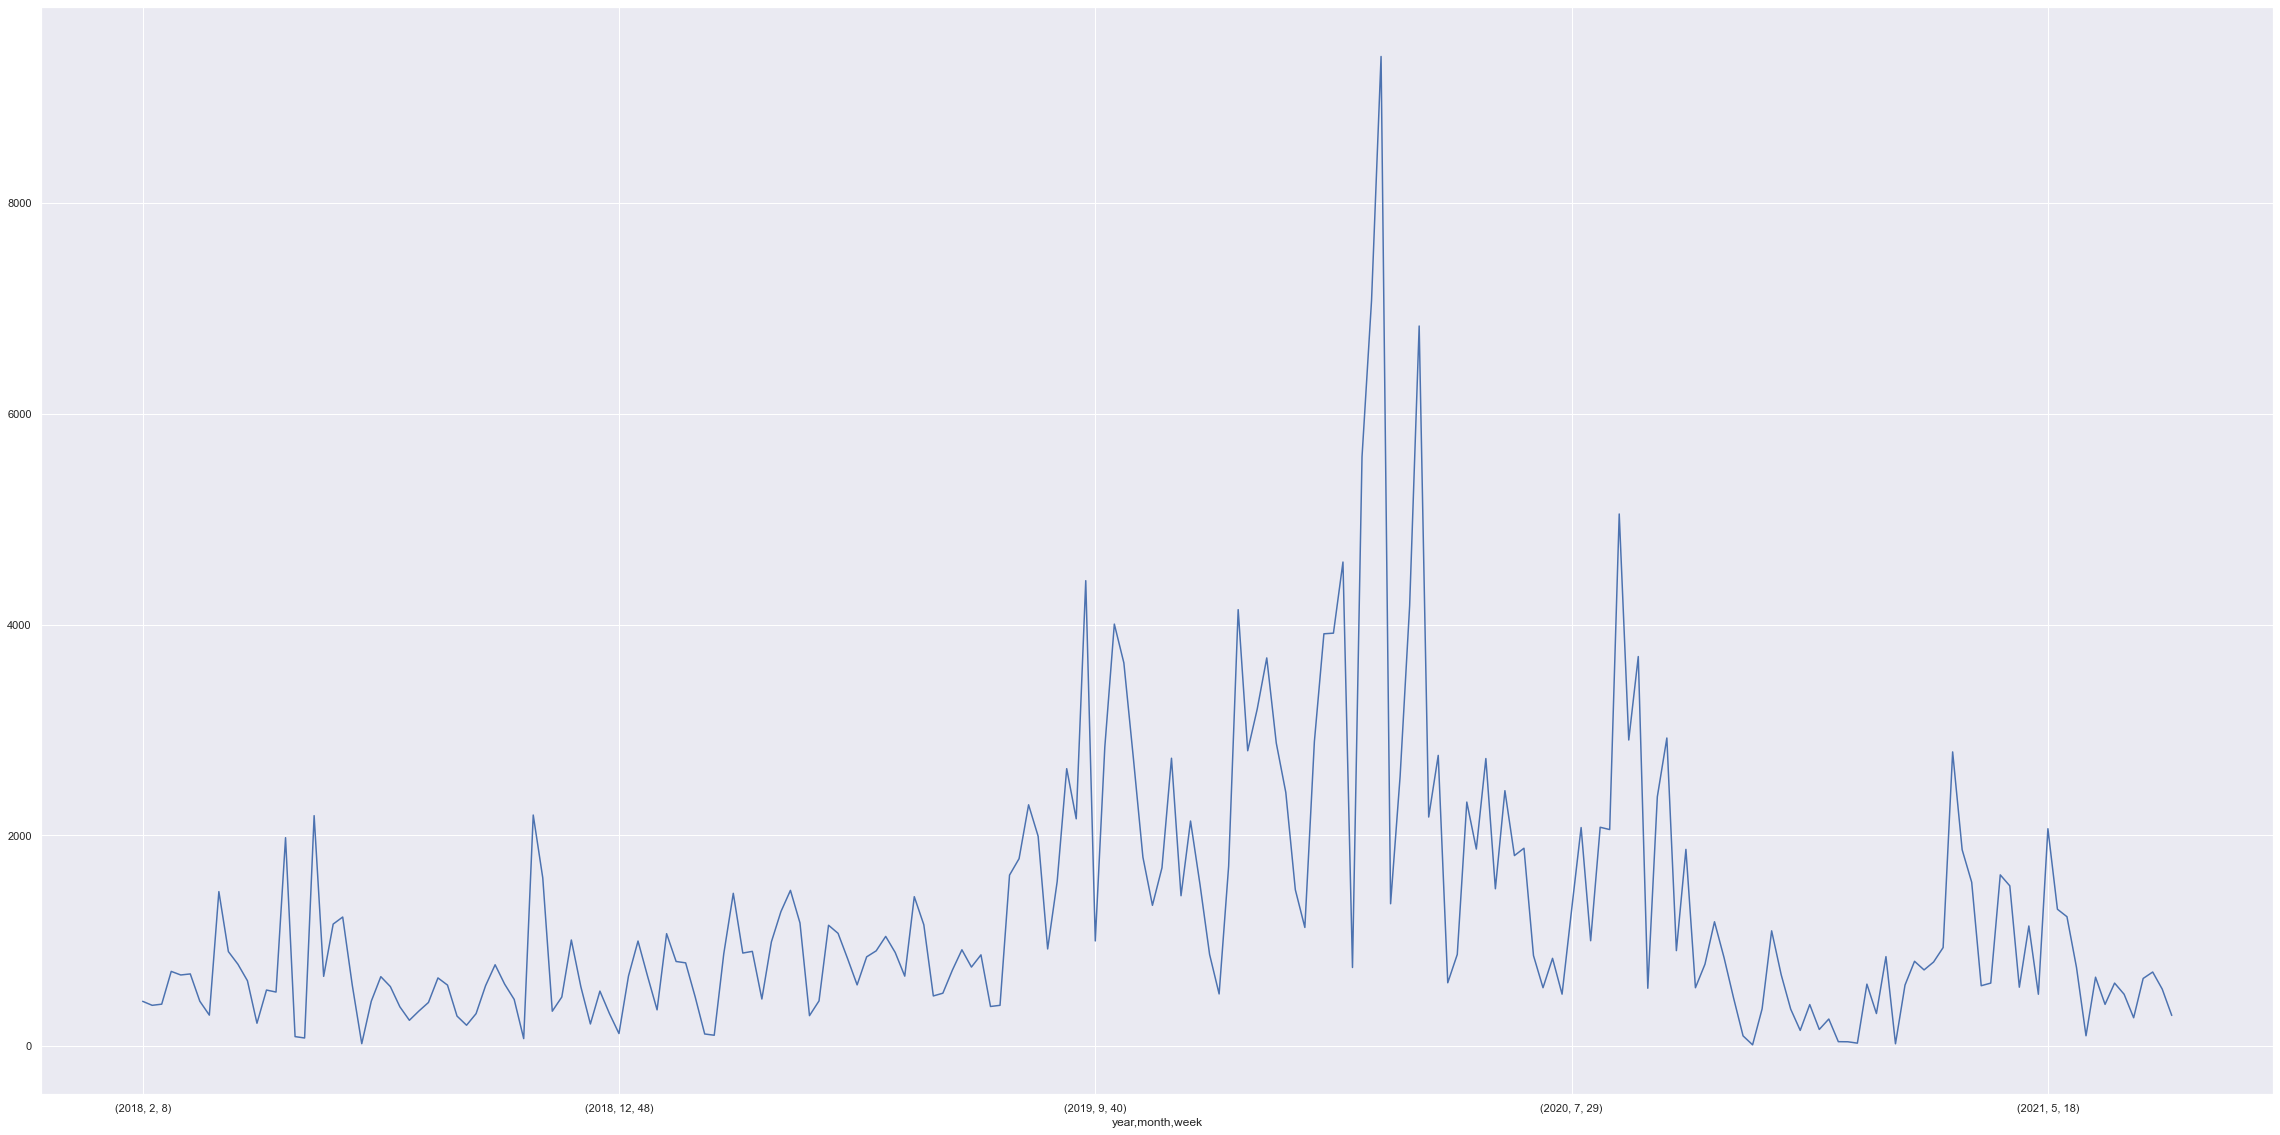

In [43]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Buy_Count_ClientI'].sum().plot();

#### 5 number of legal customers who have purchased this stock

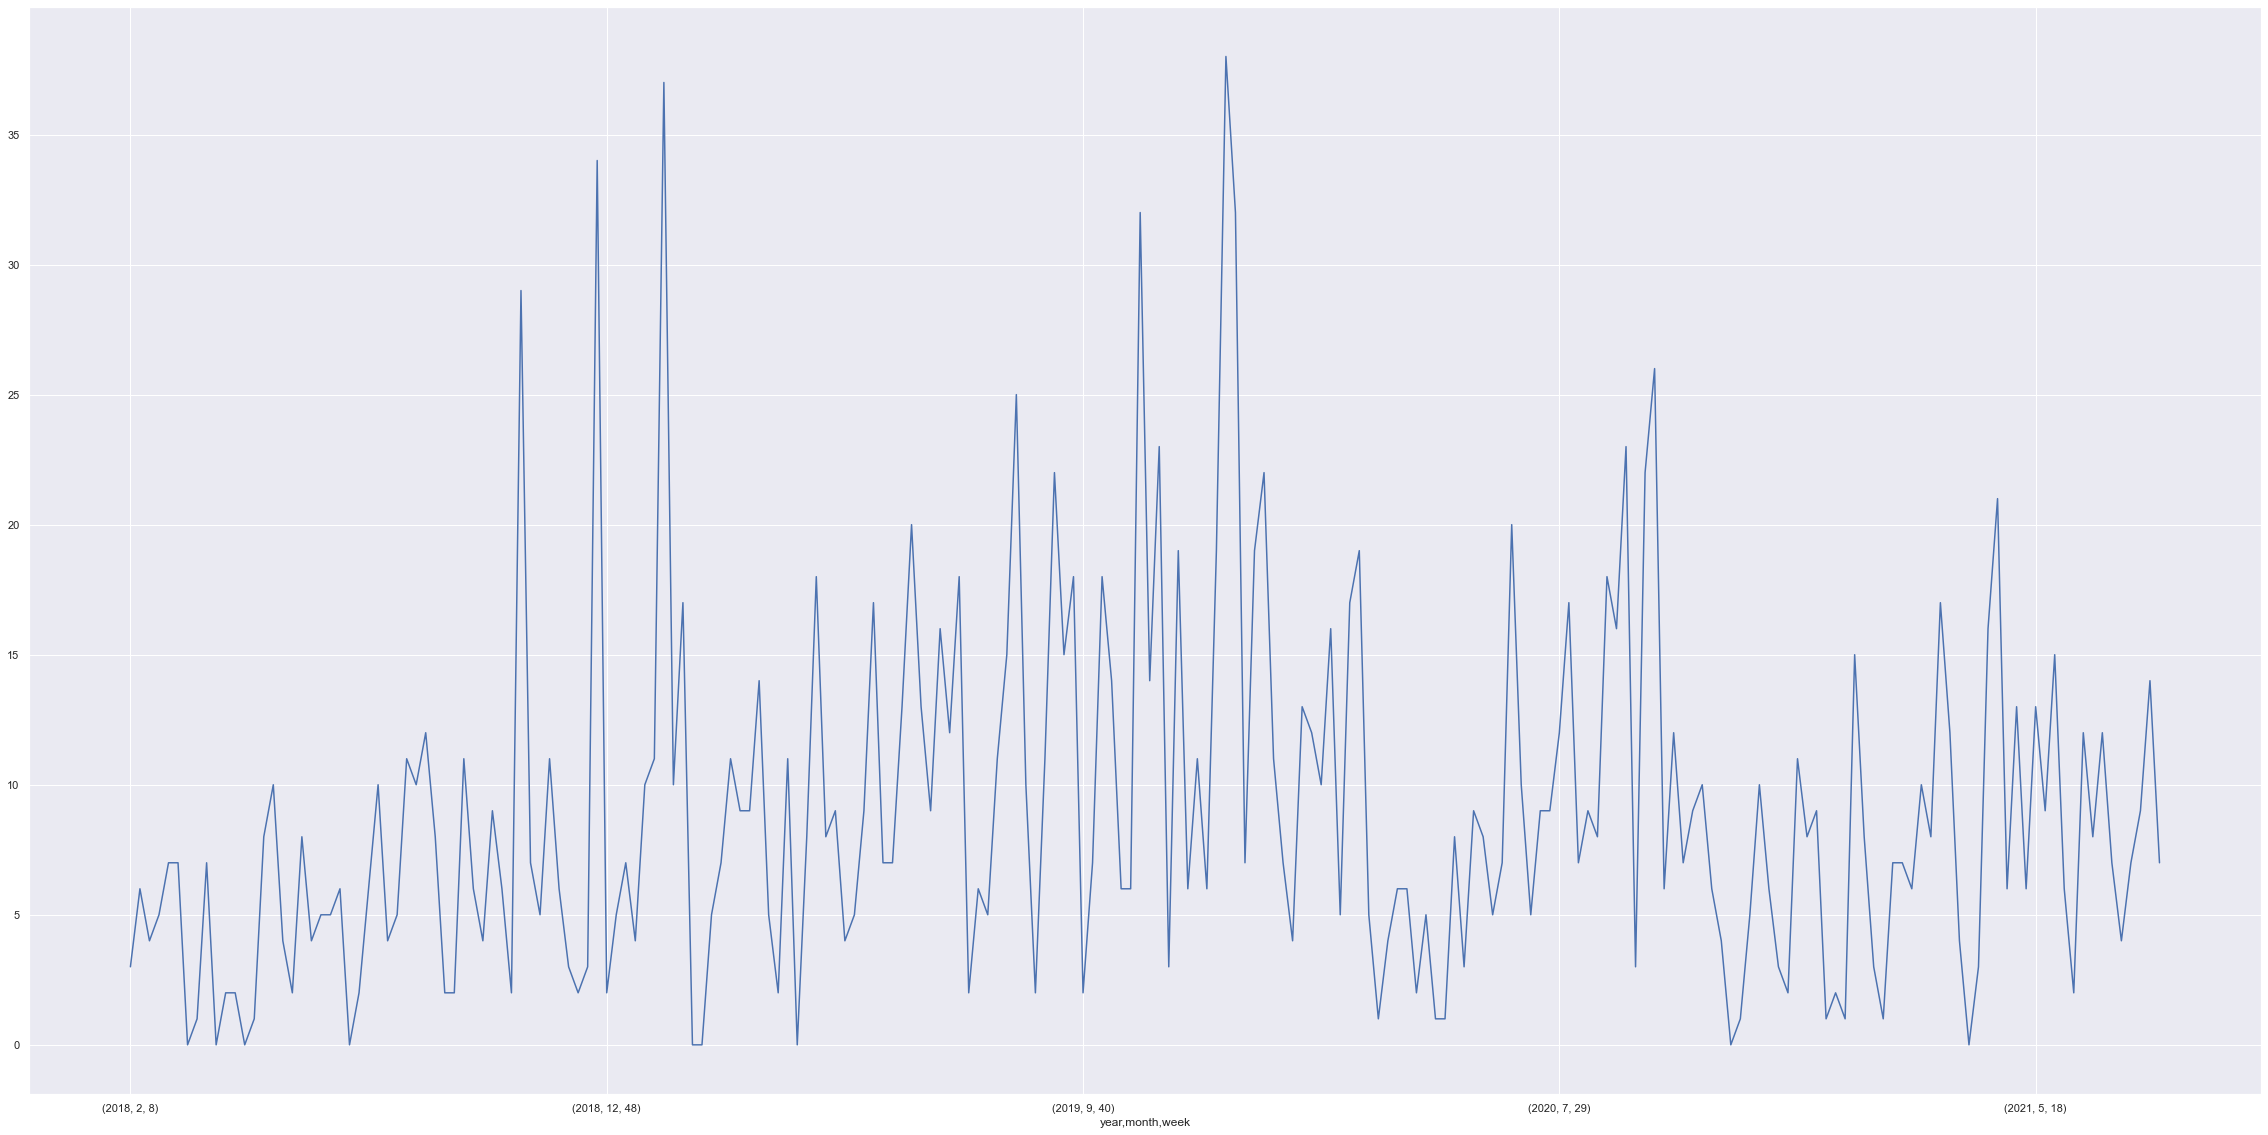

In [44]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Buy_Count_ClientN'].sum().plot();

#### 5 sell volume of real cutomers

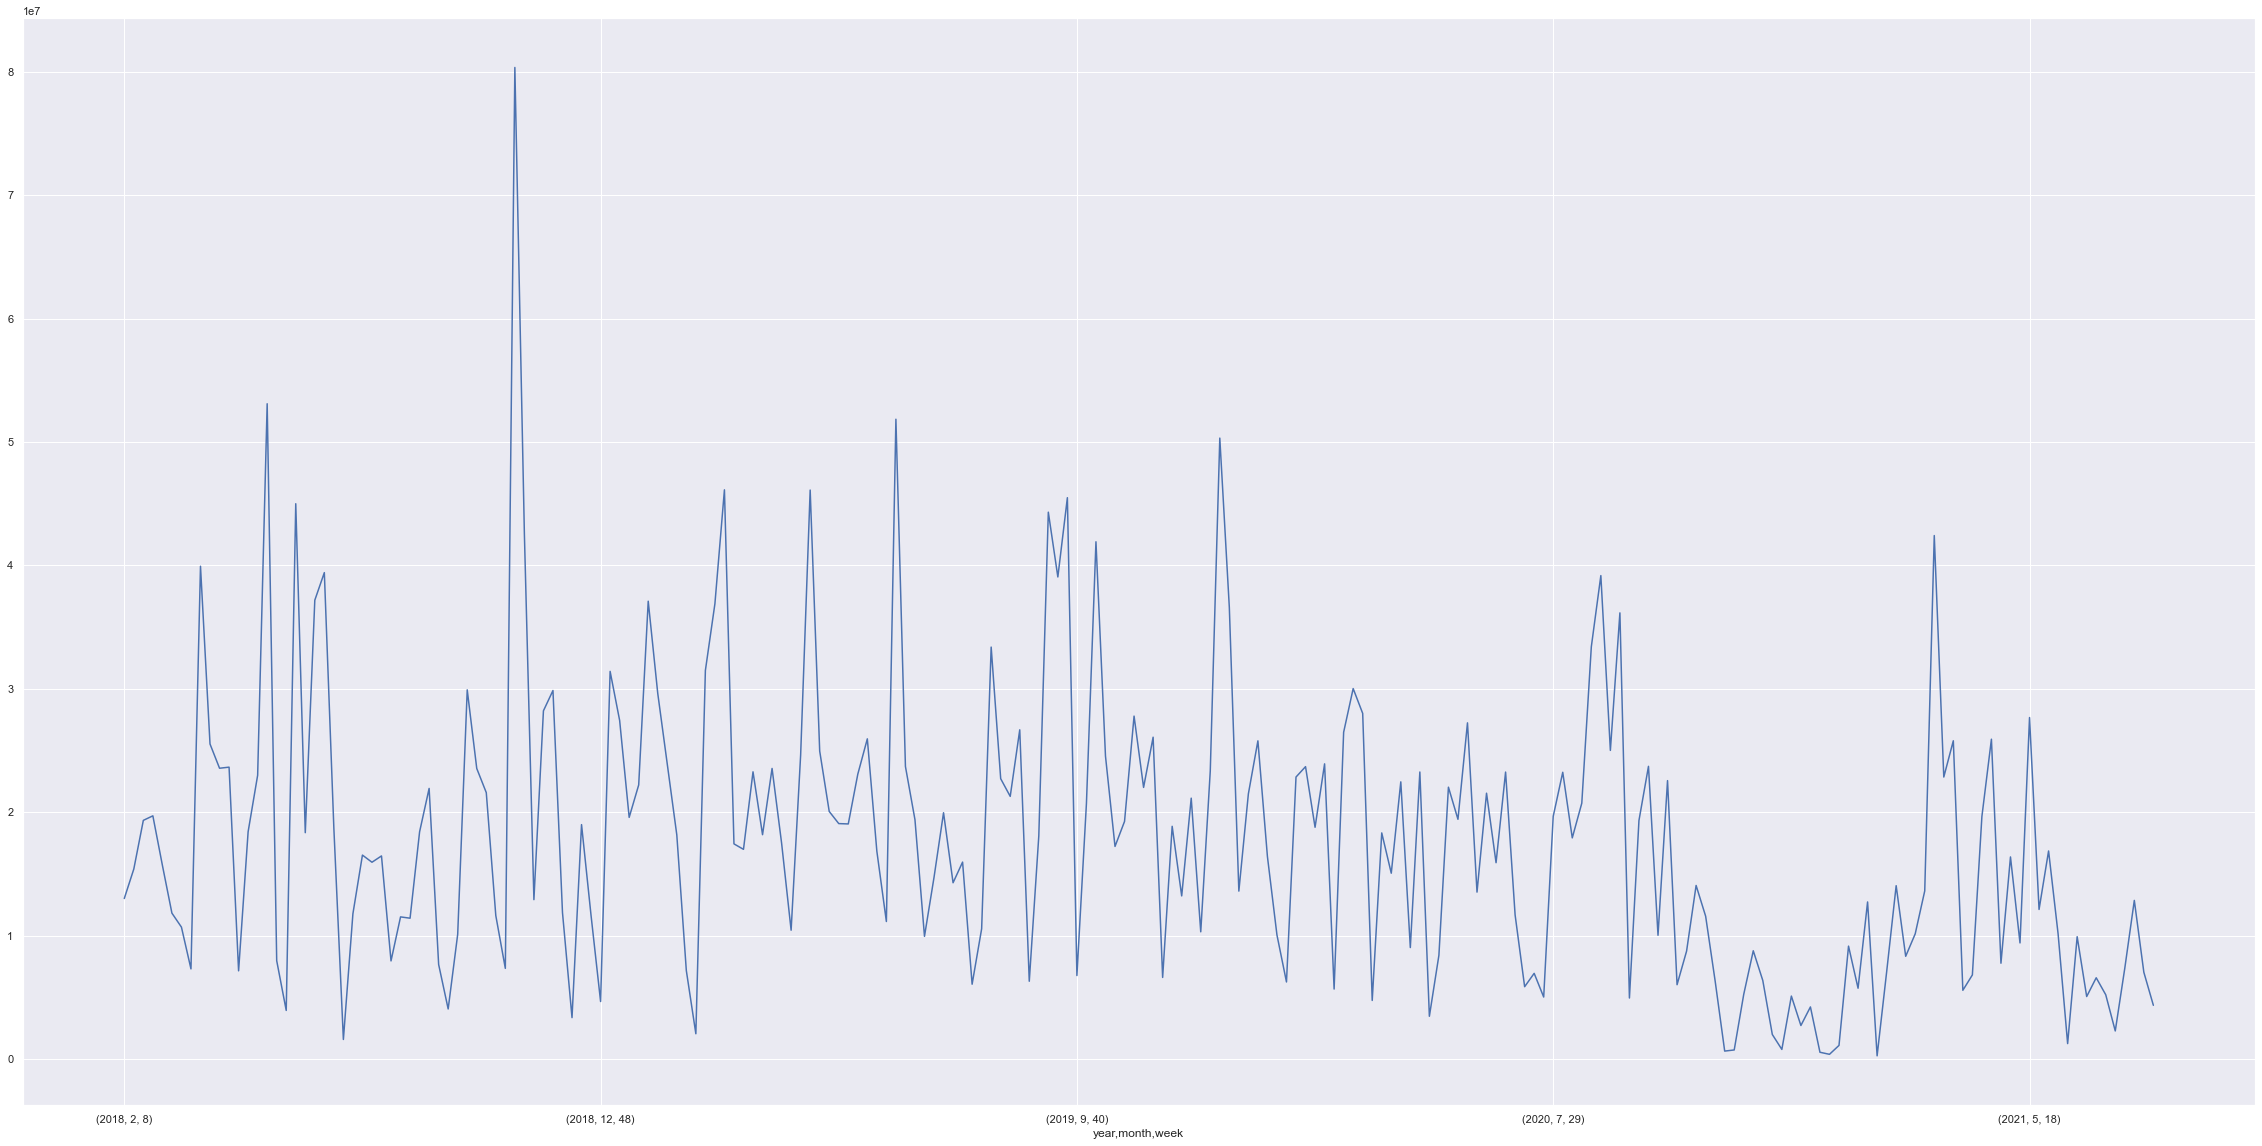

In [45]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Sell_I_Volume'].sum().plot();

#### 6 sell volume of leagal customers

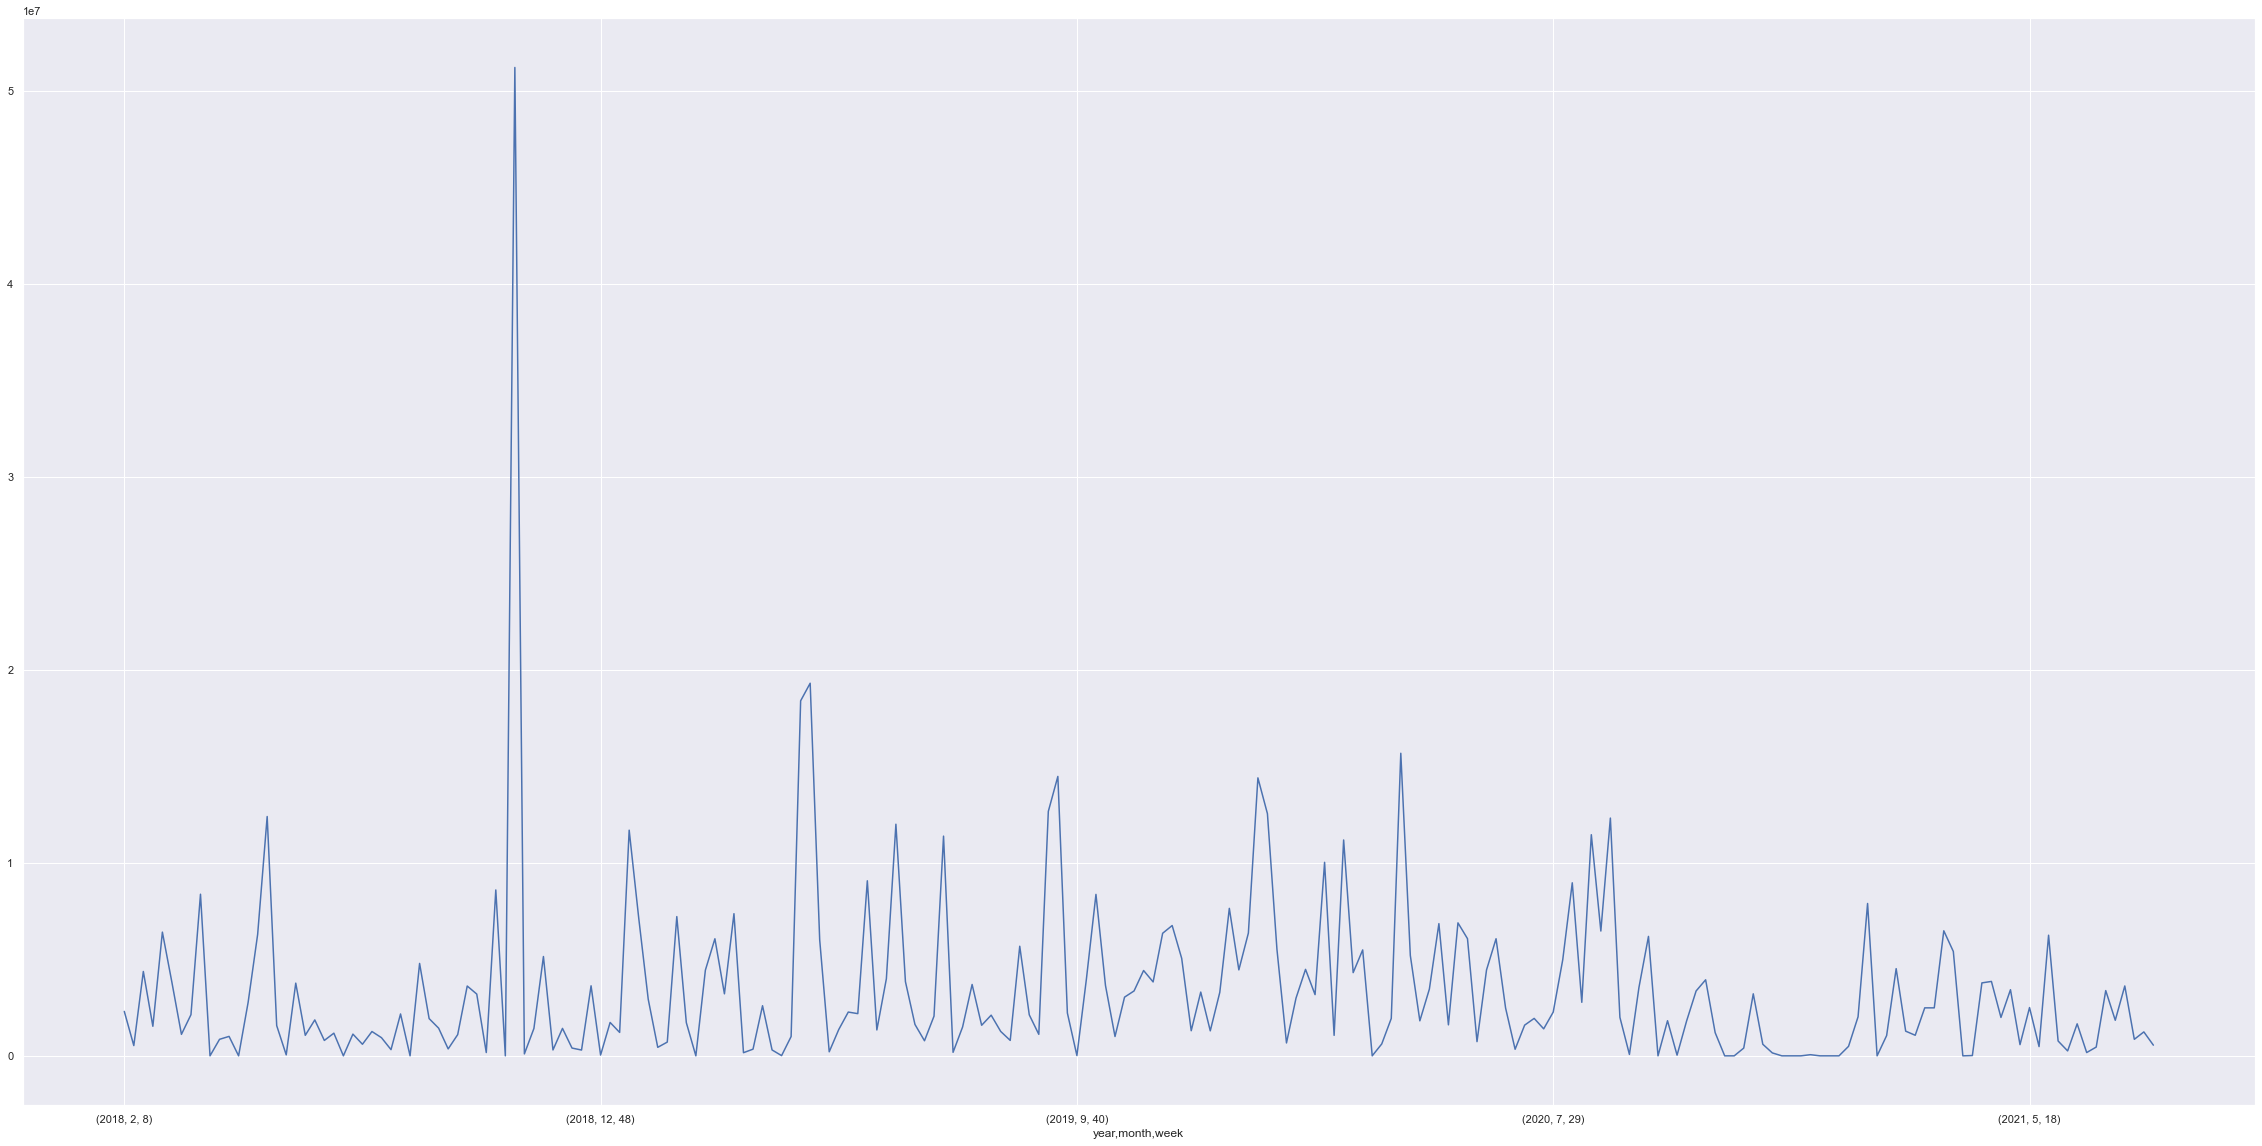

In [46]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Sell_N_Volume'].sum().plot();

#### 7 number of real cutomers who have sold their stock

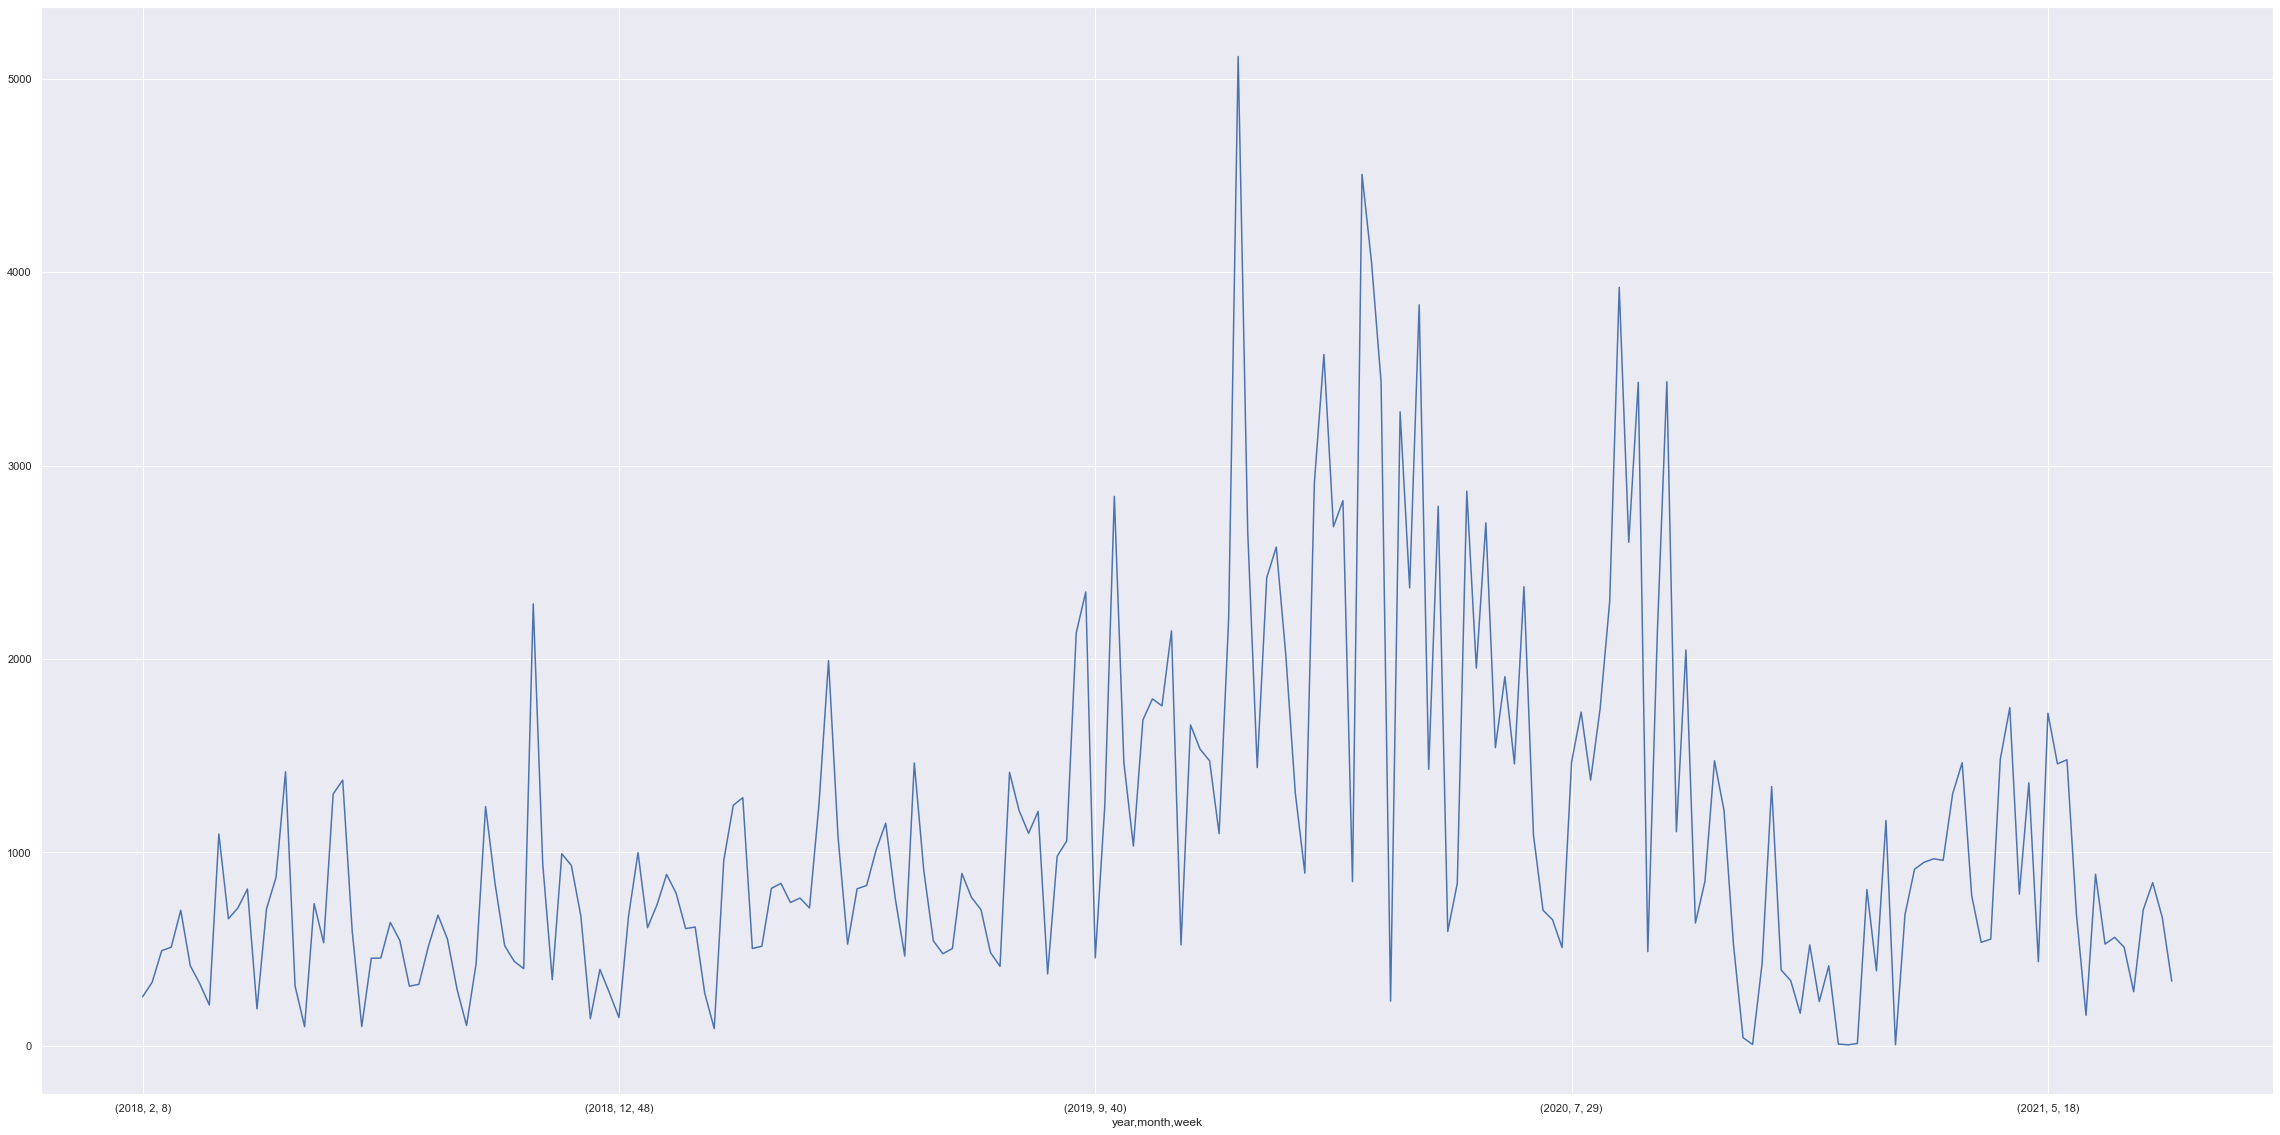

In [47]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Sell_Count_ClientI'].sum().plot();

#### 8 number of leagal customers who have sold their stock

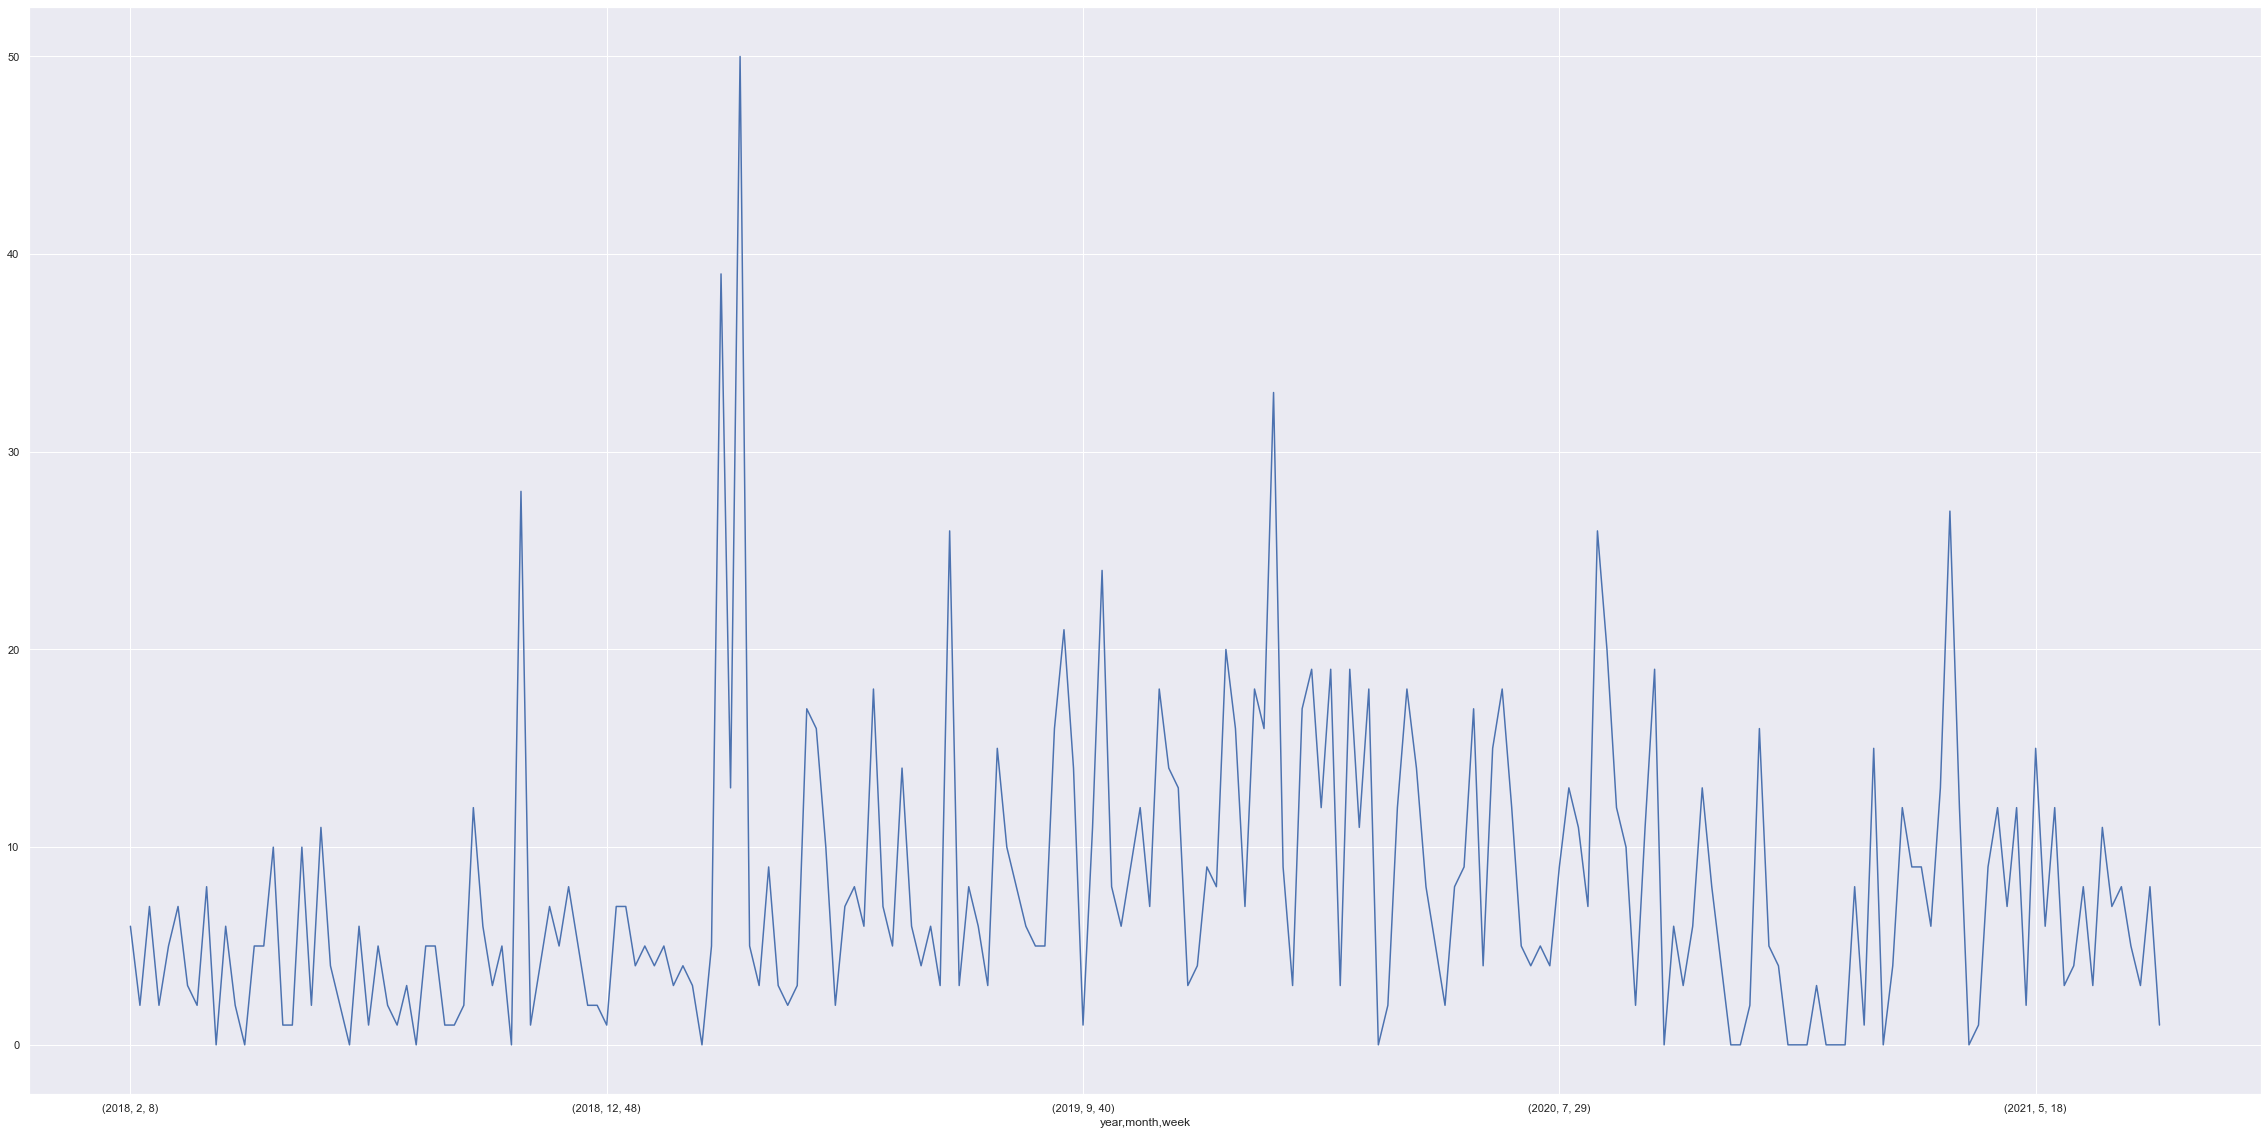

In [48]:
plt.figure(figsize=(40,20))
train.groupby(['year','month','week'])['Sell_Count_ClientN'].sum().plot();

# let's see some of these charts together

Text(0.5, 1.0, "real customers' sale volume")

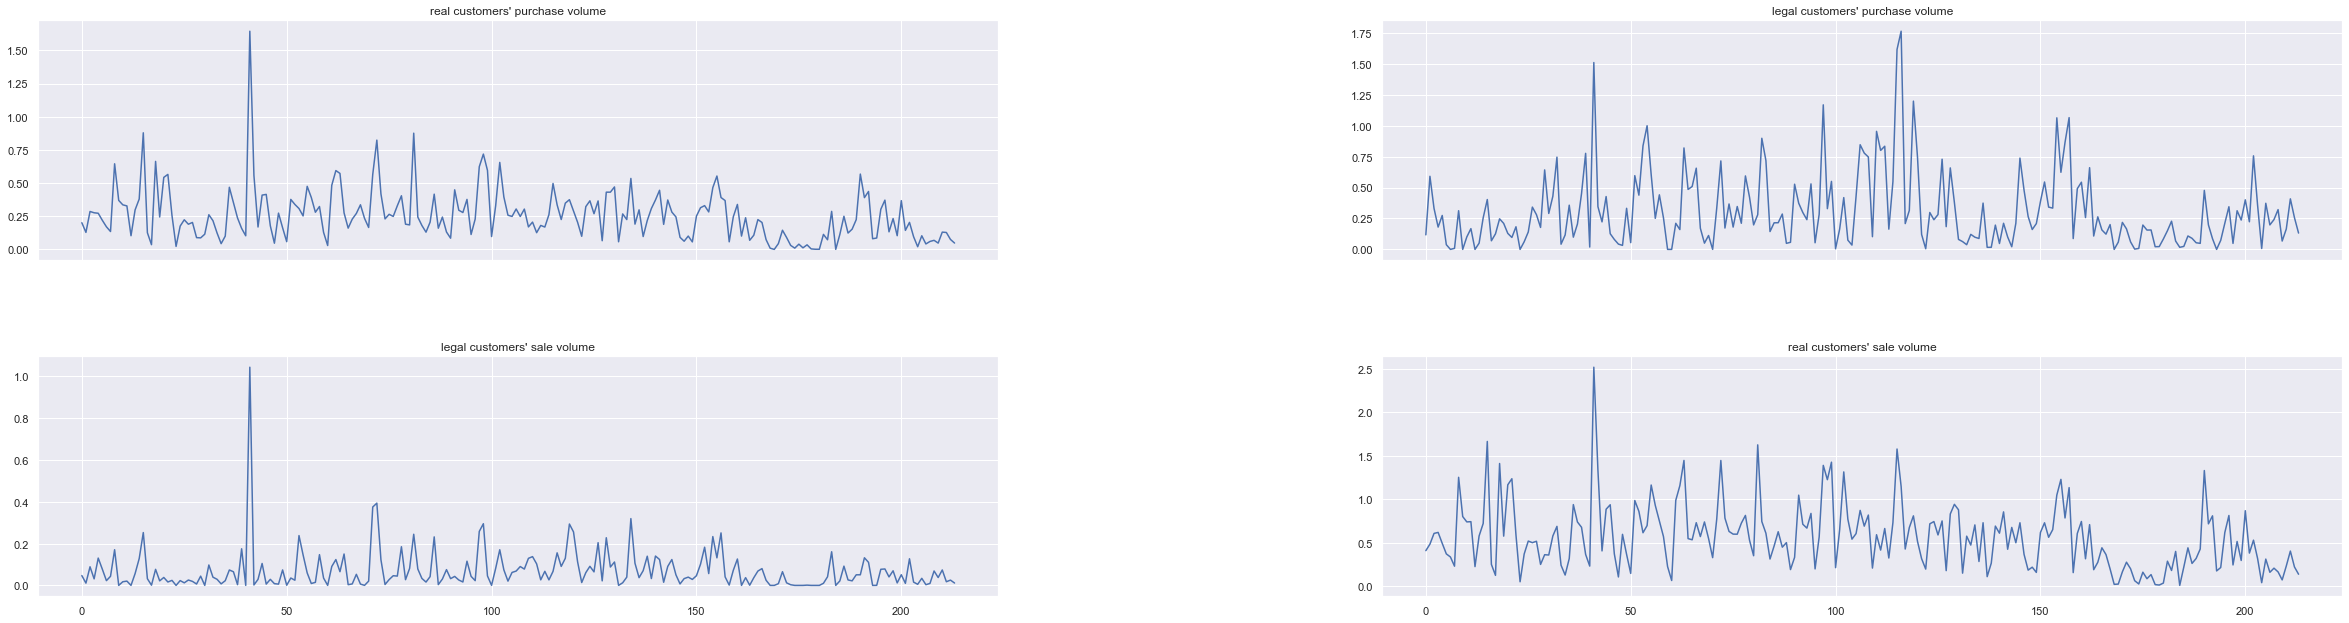

In [80]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,sharex=True,squeeze=False)
f.set_figheight(10)
f.set_figwidth(40)
ax1.plot(train_x.groupby(['year','month','week'])['Buy_I_Volume'].sum().values)
ax2.plot(train_x.groupby(['year','month','week'])['Buy_N_Volume'].sum().values);
ax3.plot(train_x.groupby(['year','month','week'])['Sell_N_Volume'].sum().values);
ax4.plot(train_x.groupby(['year','month','week'])['Sell_I_Volume'].sum().values);

plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4);

#######
ax1.set_title("real customers' purchase volume")
ax2.set_title("legal customers' purchase volume")
ax3.set_title("legal customers' sale volume")
ax4.set_title("real customers' sale volume")

In [61]:
train_x.head()

,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,year,month,day,day_of_week,week
Time,,,,,,,,,,,,,
2018-02-25,13902815.0,1400000.0,3.0,425.0,12999993.0,2302822.0,254.0,6.0,2018,2,25,6,8
2018-02-26,3714235.0,4694000.0,4.0,167.0,8408235.0,0.0,152.0,0.0,2018,2,26,0,9
2018-02-27,5161907.0,2350000.0,2.0,220.0,6980517.0,531390.0,177.0,2.0,2018,2,27,1,9
2018-03-02,13509496.0,700000.0,1.0,184.0,10170775.0,4038721.0,264.0,5.0,2018,3,2,4,9
2018-03-03,2432851.0,700000.0,1.0,91.0,2800480.0,332371.0,50.0,2.0,2018,3,3,5,9


## Modeling section

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc_out = MinMaxScaler(feature_range=(0, 1))

In [63]:
train_x['Buy_I_Volume']=sc_out.fit_transform(train_x[['Buy_I_Volume']])
train_x['Buy_N_Volume']=sc_out.fit_transform(train_x[['Buy_N_Volume']])
train_x['Sell_I_Volume']=sc_out.fit_transform(train_x[['Sell_I_Volume']])
train_x['Sell_N_Volume']=sc_out.fit_transform(train_x[['Sell_N_Volume']])
#############

val_x['Buy_I_Volume']=sc_out.fit_transform(val_x[['Buy_I_Volume']])
val_x['Buy_N_Volume']=sc_out.fit_transform(val_x[['Buy_N_Volume']])
val_x['Sell_I_Volume']=sc_out.fit_transform(val_x[['Sell_I_Volume']])
val_x['Sell_N_Volume']=sc_out.fit_transform(val_x[['Sell_N_Volume']])

############

test_x['Buy_I_Volume']=sc_out.fit_transform(test_x[['Buy_I_Volume']])
test_x['Buy_N_Volume']=sc_out.fit_transform(test_x[['Buy_N_Volume']])
test_x['Sell_I_Volume']=sc_out.fit_transform(test_x[['Sell_I_Volume']])
test_x['Sell_N_Volume']=sc_out.fit_transform(test_x[['Sell_N_Volume']])

In [115]:
train_x.drop(['year','month','day','day_of_week','week'],axis=1,inplace=True)
val_x.drop(['year','month','day','day_of_week','week'],axis=1,inplace=True)
test_x.drop(['year','month','day','day_of_week','week'],axis=1,inplace=True)

In [117]:
val_x.head()

,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN
Time,,,,,,,,
2021-07-25,0.110560,0.578863,4.0,125.0,0.078393,0.243816,106.0,2.0
2021-07-26,0.054089,0.286724,3.0,84.0,0.054148,0.101943,94.0,1.0
2021-07-27,0.016586,0.199296,2.0,59.0,0.066989,0.000000,98.0,0.0
2021-07-30,0.056345,0.635741,1.0,92.0,0.167798,0.059039,94.0,1.0
2021-07-31,0.042187,0.158283,1.0,73.0,0.098068,0.000000,98.0,0.0


#### neural network model

In [81]:
import tensorflow as tf


In [71]:
es = tf.keras.callbacks.EarlyStopping (monitor='val_loss', mode='min', verbose=1)

In [118]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(15,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile( loss = tf.keras.losses.mse, #mse stands for mean squarred error
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['mse'])
model.fit( train_x, train_y, validation_data=(val_x, val_y), epochs = 1000, verbose=1)


Epoch 1/1000
25/25 [==============================] - 1s 12ms/step - loss: 699418.3125 - mse: 699418.3125 - val_loss: 678946.3750 - val_mse: 678946.3750
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 689589.9375 - mse: 689589.9375 - val_loss: 670995.3125 - val_mse: 670995.3125
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 599637.0625 - mse: 599637.0625 - val_loss: 589128.9375 - val_mse: 589128.9375
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 383425.1250 - mse: 383425.1250 - val_loss: 433906.4375 - val_mse: 433906.4375
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 324805.6250 - mse: 324805.6250 - val_loss: 447695.0312 - val_mse: 447695.0312
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 313482.9062 - mse: 313482.9062 - val_loss: 427474.0625 - val_mse: 427474.0625
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 307150.1250 -

25/25 [==============================] - 0s 3ms/step - loss: 132597.6719 - mse: 132597.6719 - val_loss: 111733.2031 - val_mse: 111733.2031
Epoch 108/1000
25/25 [==============================] - 0s 3ms/step - loss: 121575.7500 - mse: 121575.7500 - val_loss: 112040.9219 - val_mse: 112040.9219
Epoch 109/1000
25/25 [==============================] - 0s 4ms/step - loss: 126810.4922 - mse: 126810.4922 - val_loss: 97061.4531 - val_mse: 97061.4531
Epoch 110/1000
25/25 [==============================] - 0s 2ms/step - loss: 118779.6016 - mse: 118779.6016 - val_loss: 112015.9844 - val_mse: 112015.9844
Epoch 111/1000
25/25 [==============================] - 0s 3ms/step - loss: 121524.3516 - mse: 121524.3516 - val_loss: 88245.2578 - val_mse: 88245.2578
Epoch 112/1000
25/25 [==============================] - 0s 2ms/step - loss: 117773.3828 - mse: 117773.3828 - val_loss: 94996.2969 - val_mse: 94996.2969
Epoch 113/1000
25/25 [==============================] - 0s 3ms/step - loss: 116922.4531 - mse: 11

25/25 [==============================] - 0s 3ms/step - loss: 20317.9824 - mse: 20317.9824 - val_loss: 3639.1545 - val_mse: 3639.1545
Epoch 217/1000
25/25 [==============================] - 0s 3ms/step - loss: 18590.1895 - mse: 18590.1895 - val_loss: 3796.6958 - val_mse: 3796.6958
Epoch 218/1000
25/25 [==============================] - 0s 2ms/step - loss: 15491.8262 - mse: 15491.8262 - val_loss: 3846.7014 - val_mse: 3846.7014
Epoch 219/1000
25/25 [==============================] - 0s 3ms/step - loss: 15101.6064 - mse: 15101.6064 - val_loss: 3612.4568 - val_mse: 3612.4568
Epoch 220/1000
25/25 [==============================] - 0s 3ms/step - loss: 16235.4150 - mse: 16235.4150 - val_loss: 4550.4819 - val_mse: 4550.4819
Epoch 221/1000
25/25 [==============================] - 0s 3ms/step - loss: 14883.3311 - mse: 14883.3311 - val_loss: 3849.4583 - val_mse: 3849.4583
Epoch 222/1000
25/25 [==============================] - 0s 3ms/step - loss: 15653.7051 - mse: 15653.7051 - val_loss: 3578.1003 

25/25 [==============================] - 0s 3ms/step - loss: 16674.3301 - mse: 16674.3301 - val_loss: 3492.6863 - val_mse: 3492.6863
Epoch 327/1000
25/25 [==============================] - 0s 3ms/step - loss: 14276.9883 - mse: 14276.9883 - val_loss: 3445.6792 - val_mse: 3445.6792
Epoch 328/1000
25/25 [==============================] - 0s 3ms/step - loss: 15631.0723 - mse: 15631.0723 - val_loss: 3479.3455 - val_mse: 3479.3455
Epoch 329/1000
25/25 [==============================] - 0s 2ms/step - loss: 16593.6211 - mse: 16593.6211 - val_loss: 3337.8372 - val_mse: 3337.8372
Epoch 330/1000
25/25 [==============================] - 0s 3ms/step - loss: 15171.8223 - mse: 15171.8223 - val_loss: 3363.7332 - val_mse: 3363.7332
Epoch 331/1000
25/25 [==============================] - 0s 3ms/step - loss: 15726.9062 - mse: 15726.9062 - val_loss: 4267.9897 - val_mse: 4267.9897
Epoch 332/1000
25/25 [==============================] - 0s 3ms/step - loss: 16396.0000 - mse: 16396.0000 - val_loss: 3536.1812 

25/25 [==============================] - 0s 3ms/step - loss: 15531.4365 - mse: 15531.4365 - val_loss: 3482.4683 - val_mse: 3482.4683
Epoch 437/1000
25/25 [==============================] - 0s 3ms/step - loss: 15587.0879 - mse: 15587.0879 - val_loss: 4554.1382 - val_mse: 4554.1382
Epoch 438/1000
25/25 [==============================] - 0s 2ms/step - loss: 15086.8271 - mse: 15086.8271 - val_loss: 3298.8804 - val_mse: 3298.8804
Epoch 439/1000
25/25 [==============================] - 0s 2ms/step - loss: 13624.5547 - mse: 13624.5547 - val_loss: 3339.3623 - val_mse: 3339.3623
Epoch 440/1000
25/25 [==============================] - 0s 2ms/step - loss: 13556.8115 - mse: 13556.8115 - val_loss: 3879.9448 - val_mse: 3879.9448
Epoch 441/1000
25/25 [==============================] - 0s 2ms/step - loss: 15425.9688 - mse: 15425.9688 - val_loss: 3382.3674 - val_mse: 3382.3674
Epoch 442/1000
25/25 [==============================] - 0s 2ms/step - loss: 13722.8252 - mse: 13722.8252 - val_loss: 3382.7434 

25/25 [==============================] - 0s 4ms/step - loss: 13662.8828 - mse: 13662.8828 - val_loss: 3456.3765 - val_mse: 3456.3765
Epoch 547/1000
25/25 [==============================] - 0s 2ms/step - loss: 13274.2695 - mse: 13274.2695 - val_loss: 4088.3557 - val_mse: 4088.3557
Epoch 548/1000
25/25 [==============================] - 0s 3ms/step - loss: 13728.7900 - mse: 13728.7900 - val_loss: 3454.4587 - val_mse: 3454.4587
Epoch 549/1000
25/25 [==============================] - 0s 2ms/step - loss: 13849.1152 - mse: 13849.1152 - val_loss: 3410.2920 - val_mse: 3410.2920
Epoch 550/1000
25/25 [==============================] - 0s 3ms/step - loss: 15090.4502 - mse: 15090.4502 - val_loss: 3565.9321 - val_mse: 3565.9321
Epoch 551/1000
25/25 [==============================] - 0s 3ms/step - loss: 13347.5410 - mse: 13347.5410 - val_loss: 3451.3281 - val_mse: 3451.3281
Epoch 552/1000
25/25 [==============================] - 0s 3ms/step - loss: 15266.7490 - mse: 15266.7490 - val_loss: 4016.5808 

25/25 [==============================] - 0s 2ms/step - loss: 13821.6240 - mse: 13821.6240 - val_loss: 3345.4688 - val_mse: 3345.4688
Epoch 657/1000
25/25 [==============================] - 0s 2ms/step - loss: 15062.6699 - mse: 15062.6699 - val_loss: 7264.1167 - val_mse: 7264.1167
Epoch 658/1000
25/25 [==============================] - 0s 2ms/step - loss: 25812.2852 - mse: 25812.2852 - val_loss: 9693.1504 - val_mse: 9693.1504
Epoch 659/1000
25/25 [==============================] - 0s 2ms/step - loss: 18045.1758 - mse: 18045.1758 - val_loss: 3330.8220 - val_mse: 3330.8220
Epoch 660/1000
25/25 [==============================] - 0s 2ms/step - loss: 14929.2383 - mse: 14929.2383 - val_loss: 3672.5706 - val_mse: 3672.5706
Epoch 661/1000
25/25 [==============================] - 0s 2ms/step - loss: 13968.2471 - mse: 13968.2471 - val_loss: 3402.0100 - val_mse: 3402.0100
Epoch 662/1000
25/25 [==============================] - 0s 2ms/step - loss: 13253.0840 - mse: 13253.0840 - val_loss: 5015.6880 

25/25 [==============================] - 0s 3ms/step - loss: 13879.3604 - mse: 13879.3604 - val_loss: 3391.9099 - val_mse: 3391.9099
Epoch 767/1000
25/25 [==============================] - 0s 3ms/step - loss: 14574.0400 - mse: 14574.0400 - val_loss: 4227.9512 - val_mse: 4227.9512
Epoch 768/1000
25/25 [==============================] - 0s 2ms/step - loss: 13635.1436 - mse: 13635.1436 - val_loss: 3396.2495 - val_mse: 3396.2495
Epoch 769/1000
25/25 [==============================] - 0s 3ms/step - loss: 15867.3252 - mse: 15867.3252 - val_loss: 5092.8521 - val_mse: 5092.8521
Epoch 770/1000
25/25 [==============================] - 0s 2ms/step - loss: 16457.0938 - mse: 16457.0938 - val_loss: 5269.8667 - val_mse: 5269.8667
Epoch 771/1000
25/25 [==============================] - 0s 3ms/step - loss: 15741.3115 - mse: 15741.3115 - val_loss: 6661.8535 - val_mse: 6661.8535
Epoch 772/1000
25/25 [==============================] - 0s 2ms/step - loss: 16853.5391 - mse: 16853.5391 - val_loss: 3560.0447 

25/25 [==============================] - 0s 3ms/step - loss: 14146.8584 - mse: 14146.8584 - val_loss: 3853.3127 - val_mse: 3853.3127
Epoch 877/1000
25/25 [==============================] - 0s 2ms/step - loss: 13636.0947 - mse: 13636.0947 - val_loss: 3373.2803 - val_mse: 3373.2803
Epoch 878/1000
25/25 [==============================] - 0s 3ms/step - loss: 13934.8691 - mse: 13934.8691 - val_loss: 3317.8474 - val_mse: 3317.8474
Epoch 879/1000
25/25 [==============================] - 0s 3ms/step - loss: 13673.6904 - mse: 13673.6904 - val_loss: 3459.9224 - val_mse: 3459.9224
Epoch 880/1000
25/25 [==============================] - 0s 4ms/step - loss: 12815.1260 - mse: 12815.1260 - val_loss: 3447.3506 - val_mse: 3447.3506
Epoch 881/1000
25/25 [==============================] - 0s 3ms/step - loss: 13630.2842 - mse: 13630.2842 - val_loss: 4980.1401 - val_mse: 4980.1401
Epoch 882/1000
25/25 [==============================] - 0s 3ms/step - loss: 14277.1211 - mse: 14277.1211 - val_loss: 4847.2471 

25/25 [==============================] - 0s 2ms/step - loss: 13986.0479 - mse: 13986.0479 - val_loss: 3962.1135 - val_mse: 3962.1135
Epoch 987/1000
25/25 [==============================] - 0s 2ms/step - loss: 15104.4766 - mse: 15104.4766 - val_loss: 3551.3618 - val_mse: 3551.3618
Epoch 988/1000
25/25 [==============================] - 0s 3ms/step - loss: 13224.9492 - mse: 13224.9492 - val_loss: 3699.8428 - val_mse: 3699.8428
Epoch 989/1000
25/25 [==============================] - 0s 3ms/step - loss: 13187.2783 - mse: 13187.2783 - val_loss: 5056.8857 - val_mse: 5056.8857
Epoch 990/1000
25/25 [==============================] - 0s 2ms/step - loss: 13886.0225 - mse: 13886.0225 - val_loss: 4293.7637 - val_mse: 4293.7637
Epoch 991/1000
25/25 [==============================] - 0s 2ms/step - loss: 14359.6055 - mse: 14359.6055 - val_loss: 4219.2119 - val_mse: 4219.2119
Epoch 992/1000
25/25 [==============================] - 0s 2ms/step - loss: 14223.0527 - mse: 14223.0527 - val_loss: 6038.0806 

In [119]:
val_prediction=model.predict(val_x)

4/4 [==============================] - 0s 2ms/step


In [120]:
print(mean_absolute_error(val_y,val_prediction))
print(mean_squared_error(val_y,val_prediction))

50.47861369156401
4097.227340059434


#### random forest modeling

In [121]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=200,criterion='squared_error',n_estimators=200)
regr.fit(train_x, train_y)

RandomForestRegressor(max_depth=200, n_estimators=200)

In [122]:
regr.score(train_x,train_y)

0.8755455393651519

In [123]:
val_pre=regr.predict(val_x)

In [124]:
val_pre[:10]

array([830.36896667, 803.43215334, 823.71533999, 811.284635  ,
       845.91365166, 824.756215  , 829.41057835, 794.51295833,
       809.11144499, 807.15171166])

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(val_y,val_pre))
print(mean_absolute_error(val_y,val_pre))

4026.0978979321185
49.65486134209623


#### fill test return based on random forest model

In [126]:
df['TestReturn']=0

In [127]:
first_return=regr.predict(train_x)
second_return=regr.predict(val_x)
third_return=regr.predict(test_x)

In [128]:
first_return.shape

(800,)

In [129]:
df['TestReturn'][:800]=first_return
df['TestReturn'][801:905]=second_return
df['TestReturn'][906:]=third_return

<ipython-input-129-9b59ba44d5c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TestReturn'][:800]=first_return


In [130]:
df['TestReturn']

Time
2018-02-25    839.597400
2018-02-26    800.814223
2018-02-27    830.074467
2018-03-02    847.996087
2018-03-03    811.501162
                 ...    
2022-05-17    829.327445
2022-05-21    877.454782
2022-05-22    849.853302
2022-05-23    843.350578
2022-05-24    795.126525
Name: TestReturn, Length: 993, dtype: float64

In [131]:
df.to_csv(r'E:\user\rasad qualifying task\source\data\edited\df2.csv',index=False)

### time series forecasting

In [156]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(train['TrainReturn'],model='add',period=52);

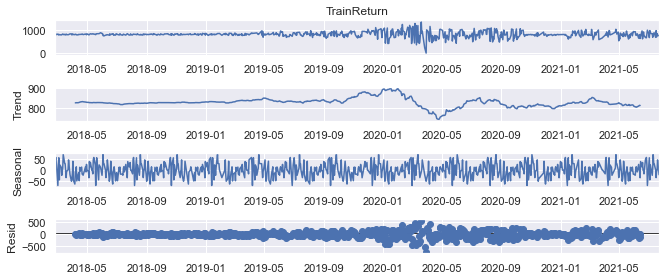

In [157]:
fig=seas_d.plot()
fig.set_figheight(40)
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()

<AxesSubplot:xlabel='Time'>

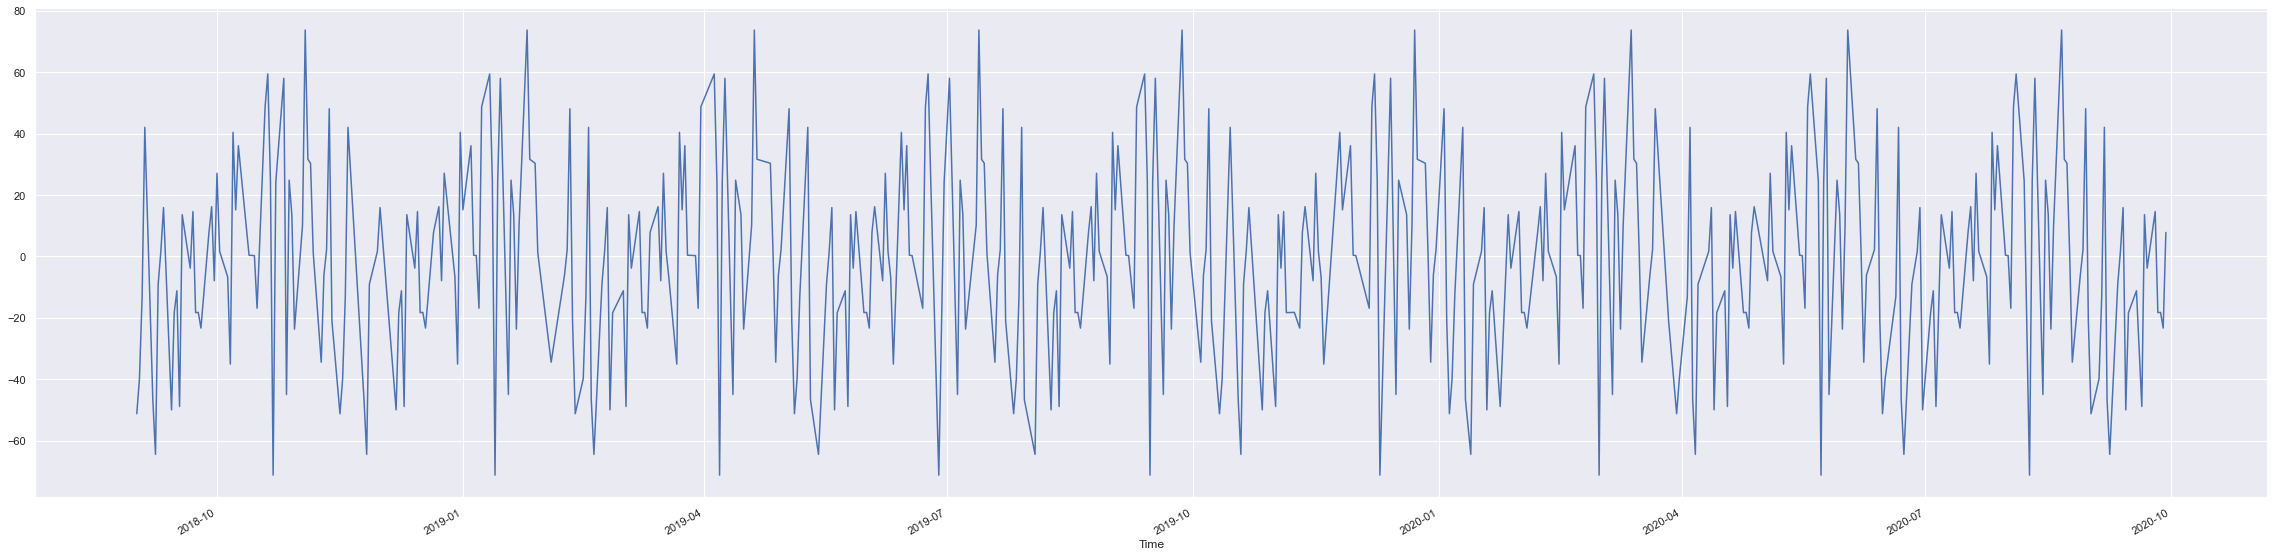

In [169]:
plt.figure(figsize=(40,10))
seas_d.seasonal['2018-09':'2020-09'].plot()

<AxesSubplot:xlabel='Time'>

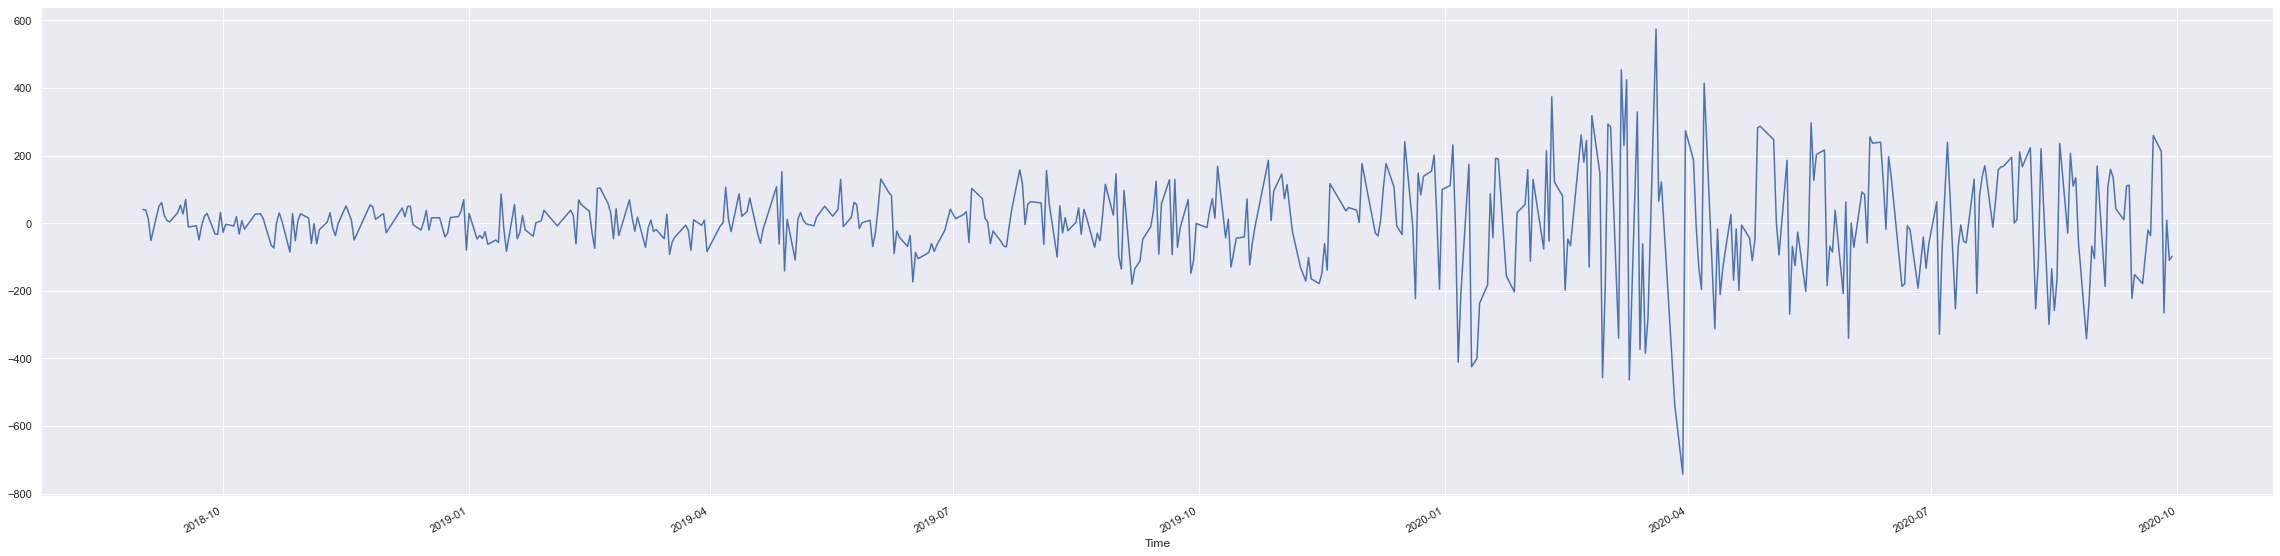

In [171]:
plt.figure(figsize=(40,10))
seas_d.resid['2018-09':'2020-09'].plot()

checking data whether it is stationary

In [146]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary for", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [147]:
test_adf(train['TrainReturn'],'Train Return')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary for Train Return


checking data whether it is white noise

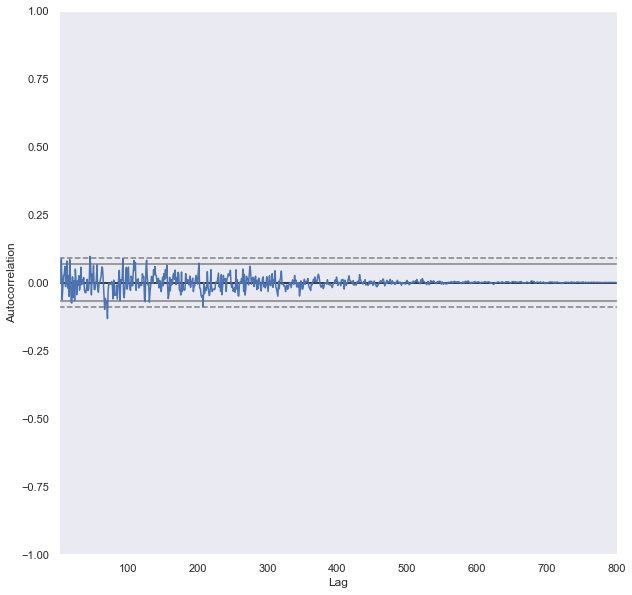

In [153]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
# autocorrelation
plt.figure(figsize=(10,10))
autocorrelation_plot(train['TrainReturn'])
pyplot.show()

# how am I supposed to forecast when there is no relationship between lagged values?!

E:\application\conda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


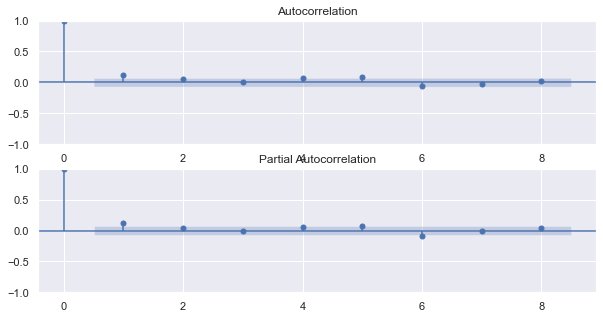

In [172]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(train_y, lags=8, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_y, lags=8, ax=ax[1])
plt.show()

In [174]:
import pmdarima
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y,
 exogenous= train_x,                    
 start_p=1, start_q=1, 
 max_p=5, max_q=4, 
 d=1, max_d=5,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=10455.156, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=10266.956, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=10203.034, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=10140.775, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.45 sec


In [176]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(4, 1, 0)   Log Likelihood               -5043.941
Date:                Tue, 04 Oct 2022   AIC                          10099.882
Time:                        19:31:40   BIC                          10127.982
Sample:                             0   HQIC                         10110.677
                                - 800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0711      4.950     -0.014      0.989      -9.773       9.631
ar.L1         -0.7318      0.020    -36.300      0.000      -0.771      -0.692
ar.L2         -0.5472      0.022    -24.928      0.000      -0.590      -0.504
ar.L3         -0.4302      0.022    -19.767      0.000      -0.473      -0.388
ar.L4         -0.2285      0.020    -11.663      0.000      -0.267      -0.190
sigma2      1.788e+04    478.026     37.411      0.000    1.69e+04    1.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              1216.97
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              26.57   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Arima

In [181]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_y,  exog=train_x,order=(4, 1, 0))
model_fit = model.fit()

E:\application\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\application\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\application\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [183]:
predictions= model_fit.predict(start =len(train_x), end=len(train_x)+len(val_x)-1,exog=val_x)

E:\application\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [193]:
predictions.values

array([860.91909126, 807.77260108, 790.84850063, 758.47878099,
       770.44905157, 777.17723591, 784.10542994, 749.40186893,
       790.65981938, 777.03991876, 774.96884709, 764.69574262,
       802.31953076, 777.07778453, 778.19285175, 783.47811325,
       798.5502291 , 805.02872237, 790.09143426, 787.34477811,
       778.52832292, 799.06545266, 709.94947241, 774.65100377,
       804.06644858, 775.46580441, 770.12833193, 822.76024998,
       802.94283909, 815.228874  , 781.03145971, 793.12083357,
       784.22081767, 743.7007343 , 783.28892658, 786.04689812,
       791.93004681, 793.42318307, 786.60715628, 800.82848708,
       816.34312158, 777.95080343, 684.96707805, 781.12206718,
       771.93827827, 778.46883038, 734.4185833 , 793.22436775,
       801.0801201 , 643.22605062, 703.89593439, 726.82066406,
       775.68765604, 770.05500614, 712.13089668, 787.04187074,
       767.62748189, 822.1065337 , 744.78959107, 803.06656624,
       751.84441086, 793.60000887, 736.0092628 , 708.20

In [187]:
val_y

Time
2021-07-25     810.006667
2021-07-26     793.283333
2021-07-27     807.219667
2021-07-30     665.087667
2021-07-31     759.841667
                 ...     
2021-12-20     865.743000
2021-12-21     720.825333
2021-12-27     960.496667
2021-12-28     913.120000
2021-12-31    1021.810000
Name: TrainReturn, Length: 104, dtype: float64

In [189]:
act= pd.DataFrame(columns=['Actual','Prediction'])

In [194]:
act['Actual']=val_y
act['Prediction']=predictions.values

In [195]:
act.head()

,Actual,Prediction
Time,,
2021-07-25,810.006667,860.919091
2021-07-26,793.283333,807.772601
2021-07-27,807.219667,790.848501
2021-07-30,665.087667,758.478781
2021-07-31,759.841667,770.449052


<AxesSubplot:xlabel='Time'>

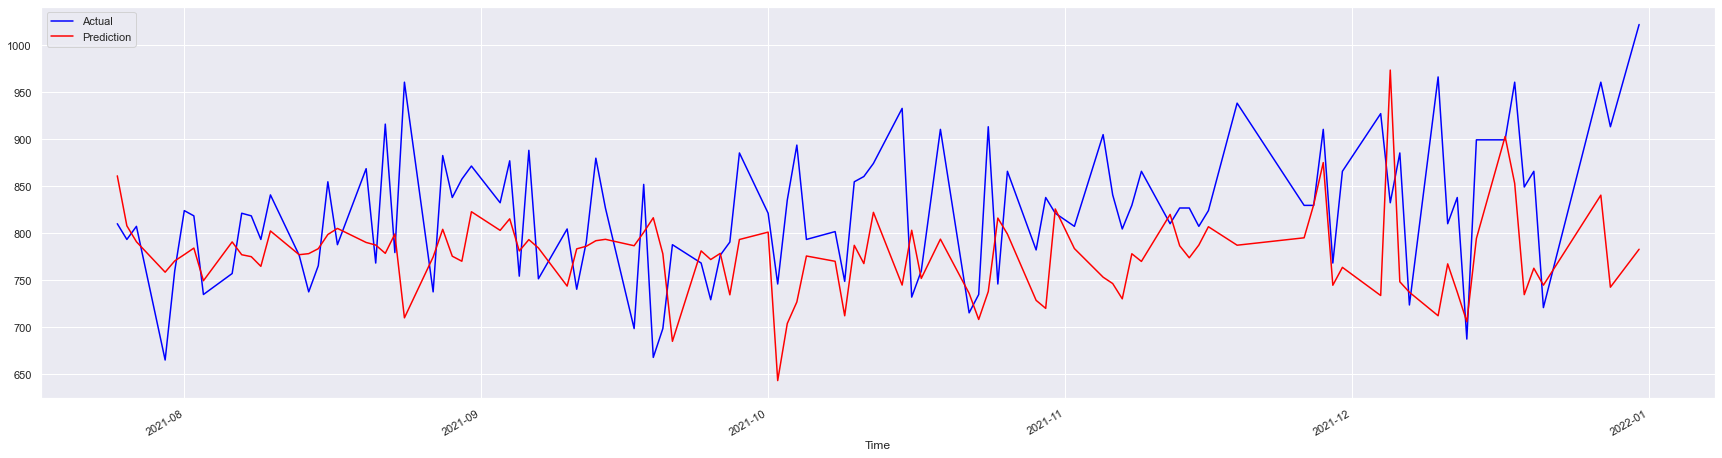

In [199]:
act['Actual'].plot(figsize=(20,8), legend=True, color="blue")
act['Prediction'].plot(legend=True, color='red', figsize=(30,8))

In [200]:
from statsmodels.tools.eval_measures import rmse
error=rmse(act['Prediction'], act['Actual'])
error

88.19550491283721

forecasting how the train return would be in future?

In [202]:
print(len(train_x))
print(len(val_x))
print(len(test_x))

800
104
87


In [206]:
df.shape

(993, 15)

In [213]:
forecast_1= results.forecast(steps=87,exog=test_x)

E:\application\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [215]:
forecast_1.shape

(87,)

In [217]:
df['TrainReturn'][906:]=forecast_1

<ipython-input-217-1f83dd1223f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TrainReturn'][906:]=forecast_1


In [218]:
df.tail()

,Buy_I_Volume,Buy_N_Volume,Buy_Count_ClientN,Buy_Count_ClientI,Sell_I_Volume,Sell_N_Volume,Sell_Count_ClientI,Sell_Count_ClientN,TrainReturn,year,month,day,day_of_week,week,TestReturn
Time,,,,,,,,,,,,,,,
2022-05-17,556875.0,19017.0,2.0,56.0,552892.0,23000.0,53.0,1.0,799.916172,2022,5,17,1,20,829.327445
2022-05-21,3143187.0,84645.0,3.0,63.0,1482431.0,1745401.0,79.0,4.0,923.454707,2022,5,21,5,20,877.454782
2022-05-22,1540997.0,34738.0,3.0,100.0,1505735.0,70000.0,107.0,2.0,798.893822,2022,5,22,6,20,849.853302
2022-05-23,383985.0,88900.0,2.0,38.0,472885.0,0.0,58.0,0.0,795.253171,2022,5,23,0,21,843.350578
2022-05-24,435431.0,147491.0,2.0,52.0,552922.0,30000.0,59.0,1.0,800.261244,2022,5,24,1,21,795.126525


<AxesSubplot:xlabel='Time'>

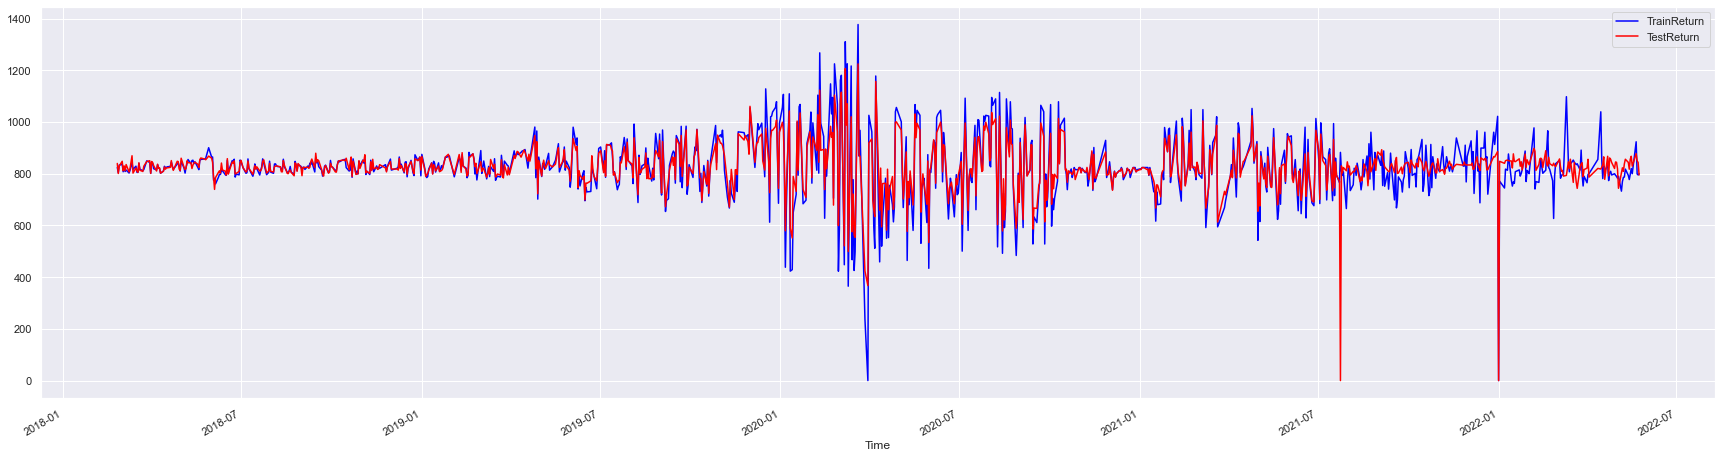

In [224]:
df['TrainReturn'].plot(figsize=(20,8), legend=True, color="blue")
df['TestReturn'].plot(legend=True, color='red', figsize=(30,8))